### STEP 0: LOAD LIBRARY AND LOAD DATA

In [2]:
# STEP 0.1 - LOAD LIBRARIES AND MODULES

# --- Core Python ---
from pathlib import Path
from collections import Counter
from dotenv import load_dotenv
import ast
import os

# --- Numerical & Data Handling ---
import numpy as np
import pandas as pd

# --- Visualization ---
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# --- Statistics & Regression ---
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import zscore

# --- Machine Learning ---
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# --- Notebook Utilities ---
from IPython.display import display

In [3]:
# STEP 0.2: LOAD DATA FROM CSV (from 1_dataset_construction.py)

# Define paths
ROOT = Path.cwd().parents[0]
INPUT_DIR = ROOT / "analysis" / "data" 
csv_path = INPUT_DIR / "final_jobs_500k.csv" # load global 500k data
print("csv_path: ", csv_path)

# Load data into DataFrame
df = pd.read_csv(
	csv_path,
	low_memory=False
)

# Display settings for unlimited rows and columns
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Adjust the display width to fit the screen
pd.set_option('display.max_colwidth', 30) # Adjust the maximum column width

# Check the first few rows of the DataFrame
df

csv_path:  d:\Work_Study\IT\Data\Projects\data_industry_insights\data_industry_insights\analysis\data\final_jobs_500k.csv


,job_id,company_id,location_id,posted_date,min_salary,max_salary,currency,required_exp_years,education_level,employment_type,job_description,remote_option,company_name,company_size,industry,city,country,country_iso,latitude,longitude,population,role_name,job_level,skill_name,skill_id,skill_category,role_id
0,12745,1710,625,2021-11-30,NaN,NaN,NaN,5.0,Bachelor,Full-time,Contract Jobs - Longterm f...,Remote,StackNexus,NaN,Manufacturing,Hyderabad,Pakistan,PK,29.973460,69.413998,2.165653e+08,Data Engineer,NaN,Azure,7,Cloud,6
1,12755,1717,621,2021-04-17,NaN,NaN,NaN,NaN,Master,Full-time,Job description Position: ...,Remote,BYGRAD,NaN,Technology,Bengaluru,India,IN,22.925006,79.593704,1.366418e+09,Data Scientist,Senior,NaN,NaN,NaN,5
2,5371,708,194,2022-12-01,NaN,NaN,NaN,NaN,NaN,Full-time,Job Title: Data Engineer D...,Remote,Two95 International Inc.,NaN,Technology,San Antonio Canada,Mexico,MX,23.935372,-102.576350,1.275755e+08,Data Engineer,NaN,Python,9,Programming,6
3,12788,1740,622,2022-10-13,NaN,NaN,NaN,NaN,Bachelor,Full-time,we are hiring for valuelab...,Remote,Saiva System,NaN,Technology,Mumbai,India,IN,22.925006,79.593704,1.366418e+09,Data Engineer,Senior,NaN,NaN,NaN,6
4,6366,776,22,2022-10-03,NaN,NaN,NaN,NaN,NaN,Part-time,Job Title: Data Entry Cler...,Remote,Apex Focus Group Inc.,NaN,Technology,Sidney,United States of America,US,45.705628,-112.599436,3.282395e+08,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513468,512650,71560,640,2025-01-01,NaN,NaN,NaN,NaN,NaN,Temporary,NaN,Remote,"Suncap Technology, Inc.",NaN,NaN,NaN,Italy,IT,42.751183,12.140788,6.029740e+07,Data Scientist,NaN,Azure; Excel; Power BI; Py...,2; 3; 39; 42; 45; 5; 7; 9,Analytics; Cloud; Database...,5
513469,512715,25070,450,2025-01-01,NaN,NaN,NaN,NaN,NaN,Full-time,NaN,Onsite,Exotec,NaN,Technology,Lille,France,FR,46.227638,2.213749,6.777400e+07,Data Engineer,NaN,NaN,NaN,NaN,6
513470,512772,4340,960,2025-01-01,NaN,NaN,NaN,NaN,NaN,Full-time,NaN,Onsite,ApTask,NaN,NaN,Tampa,United States of America,US,45.705628,-112.599436,3.282395e+08,Data Scientist,NaN,Flow; Keras; PyTorch,47; 62; 81,Data Engineering; Machine ...,5
513471,512774,85949,942,2025-01-01,NaN,NaN,NaN,NaN,NaN,Full-time,NaN,Onsite,Jobtech,NaN,NaN,Canal Fulton,United States of America,US,45.705628,-112.599436,3.282395e+08,Data Analyst,NaN,SQL; Tableau,3; 39,Database; Visualization,1


### STEP 1: EDA LEVEL 1
#### - Exploratory Data Analysis (EDA) 
#### - Level 1: Descriptive & Distribution

In [4]:
# STEP 1 (EDA1): INFO
# Step 1.1: Display general information about the dataframe
print("--- DATASET INFO ---")
df.info()

--- DATASET INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513473 entries, 0 to 513472
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   job_id              513473 non-null  int64  
 1   company_id          513473 non-null  int64  
 2   location_id         513473 non-null  int64  
 3   posted_date         513473 non-null  object 
 4   min_salary          4332 non-null    float64
 5   max_salary          4332 non-null    float64
 6   currency            319 non-null     object 
 7   required_exp_years  722 non-null     float64
 8   education_level     12774 non-null   object 
 9   employment_type     513473 non-null  object 
 10  job_description     17274 non-null   object 
 11  remote_option       513473 non-null  object 
 12  company_name        513473 non-null  object 
 13  company_size        22738 non-null   object 
 14  industry            167420 non-null  object 
 15  city         

In [5]:
# STEP 1 (EDA1): INFO
# STEP 1.2: UPDATED CONVERT D-TYPE

# 1.2.1. Convert 'posted_date' to datetime
df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce')

# 1.2.2. Convert coordinate and population columns to numeric
numeric_cols = ['latitude', 'longitude', 'population', 'min_salary', 'max_salary', 'required_exp_years']
for col in numeric_cols:
	df[col] = pd.to_numeric(df[col], errors='coerce')

# 1.2.3. Optimize categorical columns
# Added 'job_level' here as it usually has fixed values (Senior, Junior, etc.)
categorical_cols = [
	'employment_type', 'remote_option', 'education_level',
	'company_size', 'industry', 'country', 'country_iso', 'currency', 'job_level'
]

for col in categorical_cols:
	if col in df.columns:
		df[col] = df[col].astype('category')

# 1.2.4. Handle ID columns
id_cols = ['job_id', 'company_id', 'location_id', 'skill_id']
for col in id_cols:
	if col in df.columns:
		df[col] = df[col].astype(str)

# 1.2.5. Ensure new text-based columns are clean strings
text_cols = ['role_name', 'skill_name', 'skill_category']
for col in text_cols:
	if col in df.columns:
		df[col] = df[col].astype(str).replace('None', pd.NA)

# Verify the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513473 entries, 0 to 513472
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   job_id              513473 non-null  object        
 1   company_id          513473 non-null  object        
 2   location_id         513473 non-null  object        
 3   posted_date         513473 non-null  datetime64[ns]
 4   min_salary          4332 non-null    float64       
 5   max_salary          4332 non-null    float64       
 6   currency            319 non-null     category      
 7   required_exp_years  722 non-null     float64       
 8   education_level     12774 non-null   category      
 9   employment_type     513473 non-null  category      
 10  job_description     17274 non-null   object        
 11  remote_option       513473 non-null  category      
 12  company_name        513473 non-null  object        
 13  company_size        22738 non

In [6]:
# STEP 1 (EDA1): INFO
# STEP 1.3: CHECK CURRENCY COUNTS

# 1.3.1. Detailed statistics for each currency unit
# value_counts(dropna=False) ensures we see the count for missing values (NaN)
currency_stats = df['currency'].value_counts(dropna=False).reset_index()
currency_stats.columns = ['Currency Unit', 'Row Count']

# 1.3.2. Add a percentage column for better context
currency_stats['Percentage (%)'] = (currency_stats['Row Count'] / len(df) * 100).round(2)

print("--- Detailed Currency Statistics ---")
print(currency_stats)

# 1.3.3. Summary of unique units
unique_units = df['currency'].nunique()
missing_values = df['currency'].isna().sum()

print(f"\nSummary:")
print(f"- Total unique currency units found: {unique_units}")
print(f"- Total rows missing currency (NaN): {missing_values} ({ (missing_values/len(df)*100):.2f}%)")

--- Detailed Currency Statistics ---
  Currency Unit  Row Count  Percentage (%)
0           NaN     513154           99.94
1    USD               286            0.06
2    EUR                16            0.00
3    PLN                10            0.00
4    INR                 3            0.00
5    CHF                 2            0.00
6    GBP                 1            0.00
7    AUD                 1            0.00

Summary:
- Total unique currency units found: 7
- Total rows missing currency (NaN): 513154 (99.94%)


In [7]:
# STEP 1 (EDA1): INFO
# STEP 1.4: CONVERT ALL CURRENCY TO USD

# 1.4.1. Fill missing currencies with 'USD' ONLY IF there is salary data
# This fulfills your requirement: "rows with min/max salary but empty currency -> fill as USD"
# FIX: currency là Categorical → ép về string để cho phép gán 'USD'
df['currency'] = df['currency'].astype(str).replace({'nan': None})

mask_missing_currency = (df['currency'].isna()) & (df['min_salary'].notna() | df['max_salary'].notna())
df.loc[mask_missing_currency, 'currency'] = 'USD'


# 1.4.2. Define Exchange Rates (Update these values if needed)
exchange_rates = {
	'USD': 1.0,
	'EUR': 1.08,
	'PLN': 0.25,
	'INR': 0.012,
	'CHF': 1.15,
	'GBP': 1.27,
	'AUD': 0.66
}

# 1.4.3. Map exchange rates (Default to 1.0 if still unknown)
df['ex_rate'] = df['currency'].map(exchange_rates).astype(float).fillna(1.0)

# 1.4.4. Convert salary columns to USD
df['min_salary_usd'] = df['min_salary'] * df['ex_rate']
df['max_salary_usd'] = df['max_salary'] * df['ex_rate']

# 1.4.5. Calculate average salary in USD
df['avg_salary_usd'] = df[['min_salary_usd', 'max_salary_usd']].mean(axis=1)

# 1.4.6. Final Check
print("--- Final Salary Conversion Summary ---")
print(f"Total rows forced to USD (missing currency but had salary): {mask_missing_currency.sum()}")
print(f"Total jobs with valid USD salary: {df['avg_salary_usd'].notnull().sum()}")
print("\nSample of converted data:")
print(df[df['avg_salary_usd'].notnull()][['currency', 'min_salary', 'max_salary', 'avg_salary_usd']].head(10))

--- Final Salary Conversion Summary ---
Total rows forced to USD (missing currency but had salary): 4026
Total jobs with valid USD salary: 4332

Sample of converted data:
          currency  min_salary  max_salary  avg_salary_usd
98             USD   399825.00   399825.00       399825.00
99      USD          100000.00   130000.00       115000.00
100            USD   369600.00   369600.00       369600.00
101            USD    43417.32    43417.32        43417.32
250098         USD    47040.14    47040.14        47040.14
250099         USD   104000.00   114400.00       109200.00
250100         USD    75600.00    88200.00        81900.00
250101  EUR           20800.00    23400.00        22100.00
250102  EUR           23400.00    28600.00        26000.00
250103         USD    24960.00    29952.00        27456.00


In [8]:
# STEP 1 (EDA1): INFO
# STEP 1.5: CHECK MISSING CURRENCY

# Check missing values come from what countries
missing = df[df['min_salary_usd'].isna()][['country', 'currency']] # Show rows with missing salary usd, and show 2 columns

 # Drop duplicates countries
country_count_NA = missing.drop_duplicates()

# Summary
print("Total countrys with missing data:", len(country_count_NA))
print(country_count_NA)

Total countrys with missing data: 170
                         country    currency
0                       Pakistan        None
1                          India        None
2                         Mexico        None
4       United States of America        None
5                         Canada        None
...                          ...         ...
413635  United States of America  EUR       
418592                 Venezuela  USD       
418966  United States of America  PLN       
422155                    Serbia  INR       
425220                   Georgia        None

[170 rows x 2 columns]


In [9]:
# STEP 1 (EDA1): INFO
# STEP 1.6: groupby(['country', 'currency'])

df.groupby(['country', 'currency'], observed=False).agg(
	jobs=('job_id', 'count'),
	avg_salary_usd=('avg_salary_usd', 'mean')
).reset_index()


,country,currency,jobs,avg_salary_usd
0,Afghanistan,AUD,0,NaN
1,Afghanistan,CHF,0,NaN
2,Afghanistan,EUR,0,NaN
3,Afghanistan,GBP,0,NaN
4,Afghanistan,INR,0,NaN
...,...,...,...,...
1267,Zimbabwe,GBP,0,NaN
1268,Zimbabwe,INR,0,NaN
1269,Zimbabwe,PLN,0,NaN
1270,Zimbabwe,USD,3,91935.216667


In [10]:
# STEP 1 (EDA1): INFO
# STEP 1.7: SALARY SUMMARY REPORT (USD) - Short & Clean

salary_cols = ['min_salary_usd', 'max_salary_usd', 'avg_salary_usd']

# min, median (50%), mean, max
summary = df[salary_cols].agg(['min', 'median', 'mean', 'max']).T

# Format USD
summary_formatted = summary.copy()

for col in summary_formatted.columns:
	summary_formatted[col] = summary_formatted[col].map(
		lambda x: f"${x:,.0f}" if pd.notna(x) else "—"
	)

summary_formatted.rename(columns={
	'min': 'Minimum',
	'median': 'Median',
	'mean': 'Average',
	'max': 'Maximum'
}, inplace=True)

# Visual
print("\n" + "="*50)
print("💼 SALARY SUMMARY (USD) 💼")
print("="*50)
print(summary_formatted)


💼 SALARY SUMMARY (USD) 💼
                Minimum    Median   Average   Maximum
min_salary_usd  $20,800  $100,000  $133,380  $480,000
max_salary_usd  $23,400  $110,000  $153,036  $500,000
avg_salary_usd  $22,100  $104,000  $143,208  $480,000


In [11]:
# STEP 2 (EDA1): DESCRIBE

# 2.1. For Numbers
print("--- NUMERICAL STATS ---")
display(df.describe())

# 2.2. For Text
print("\n--- CATEGORICAL STATS ---")
display(df.describe(include='object'))

--- NUMERICAL STATS ---


,posted_date,min_salary,max_salary,required_exp_years,latitude,longitude,population,ex_rate,min_salary_usd,max_salary_usd,avg_salary_usd
count,513473,4332.000000,4332.000000,722.000000,512816.000000,512816.000000,5.128160e+05,513473.0,4332.000000,4332.000000,4332.000000
mean,2024-05-16 09:56:51.528162048,133380.154771,153036.120838,4.569252,34.885220,-36.105454,2.069520e+08,1.0,133380.154771,153036.120838,143208.137805
min,2021-04-17 00:00:00,20800.000000,23400.000000,0.000000,-41.662579,-157.429600,1.300000e+04,1.0,20800.000000,23400.000000,22100.000000
25%,2023-10-15 00:00:00,65000.000000,70251.030000,3.000000,23.935372,-112.599436,5.855827e+07,1.0,65000.000000,70251.030000,67600.000000
50%,2024-01-12 00:00:00,100000.000000,110000.000000,5.000000,42.751183,-8.055766,8.313280e+07,1.0,100000.000000,110000.000000,104000.000000
75%,2024-11-22 00:00:00,156000.000000,168716.605000,6.000000,45.705628,12.140788,3.282395e+08,1.0,156000.000000,168716.605000,163480.920000
max,2025-12-31 00:00:00,480000.000000,500000.000000,20.000000,65.074276,172.701926,1.397715e+09,1.0,480000.000000,500000.000000,480000.000000
std,NaN,95842.968588,119705.057210,2.230490,20.012355,77.107302,2.684999e+08,0.0,95842.968588,119705.057210,107018.972671



--- CATEGORICAL STATS ---


,job_id,company_id,location_id,currency,job_description,company_name,city,role_name,skill_name,skill_id,skill_category,role_id
count,513473,513473,513473,4345,17274,513473,403980,513473,513473,513473,513473,504895
unique,513473,105276,8352,8,5071,105276,8333,109,90733,90733,248,108
top,12745,9802,640,USD,*Earn up to $16 USD/hourly...,Emprego,Singapore,Data Engineer,nan,nan,nan,6
freq,1,7039,106877,4026,3712,7039,15546,187099,99050,99050,99050,187099


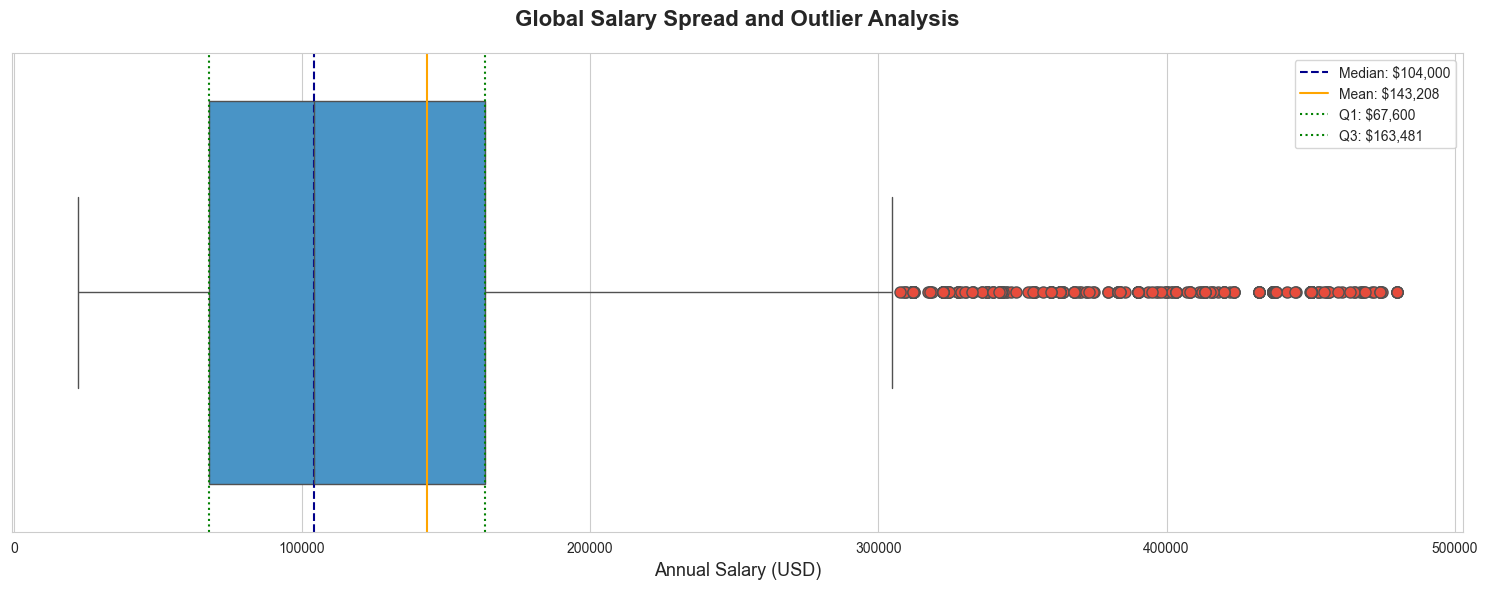

In [12]:
# STEP 3 (EDA1): BOXPLOT
# Step 3.1: Global Salary Boxplot

# 3.1.0. Set plot style and size
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

# 3.1.1. Calculate key statistics directly from the data to ensure 100% accuracy
# This prevents manual entry errors for Q1 and Q3
stats = df['avg_salary_usd'].describe()

median_val = stats['50%']  # 104022.06
q1_val = stats['25%']
q3_val = stats['75%']
mean_val = stats['mean']    # 143098.19

# 3.1.2. Create the Boxplot
# Use the boxplot to visualize the spread and outliers mentioned in your report
ax = sns.boxplot(x=df['avg_salary_usd'],
				 color='#3498db',
				 linewidth=1,
				 flierprops={'markerfacecolor':'#e74c3c', 'marker':'o', 'markersize':8})

# 3.1.3. Add titles and labels in English
plt.title('Global Salary Spread and Outlier Analysis', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Annual Salary (USD)', fontsize=13)

# 3.1.4. Annotating key statistics
# Drawing vertical lines to visualize the 'Right-Skewed' nature of the data
plt.axvline(median_val, color='darkblue', linestyle='--', label=f'Median: ${median_val:,.0f}')
plt.axvline(mean_val, color='orange', linestyle='-', label=f'Mean: ${mean_val:,.0f}')
plt.axvline(q1_val, color='green', linestyle=':', label=f'Q1: ${q1_val:,.0f}')
plt.axvline(q3_val, color='green', linestyle=':', label=f'Q3: ${q3_val:,.0f}')

# Display Legend
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

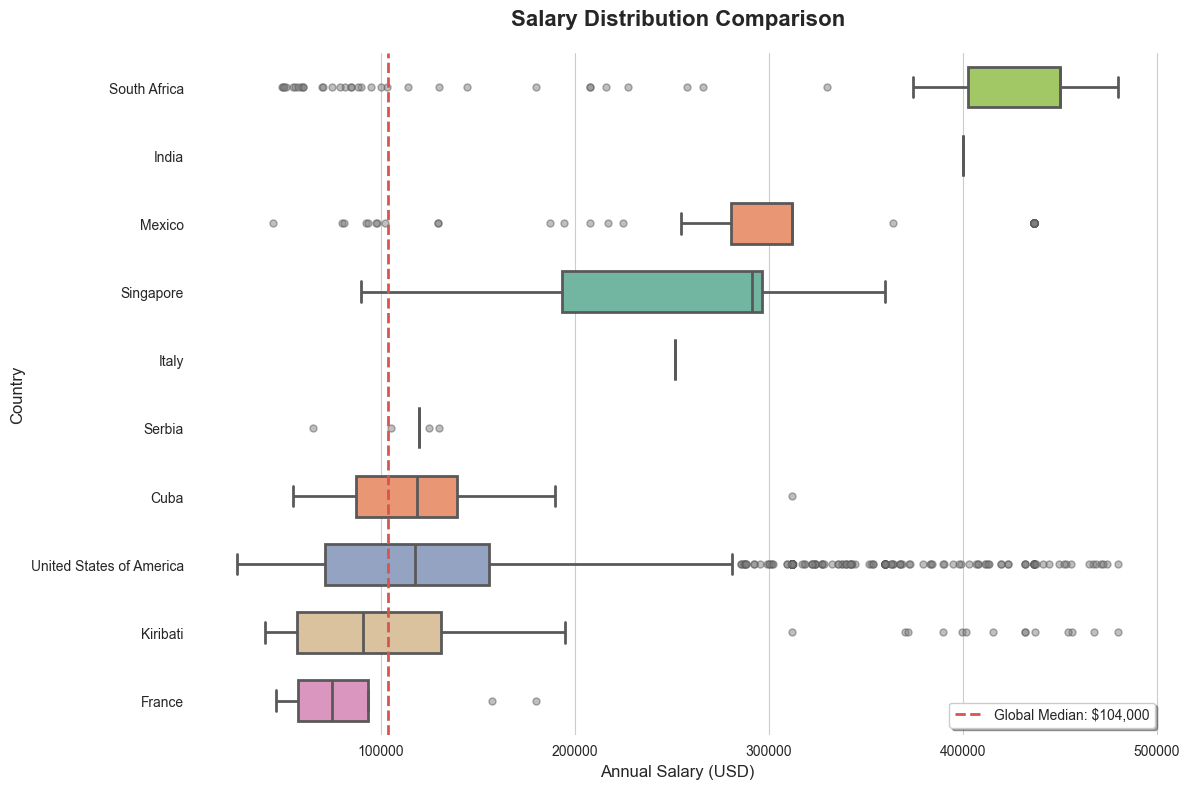

In [13]:
# STEP 3 (EDA1): BOXPLOT
# Step 3.2: Country-wise Salary Boxplot

# 3.2.1. Total Reset of the plotting environment
plt.close('all')
plt.cla()
plt.clf()

# 3.2.2. Identify the REAL Top 10 countries by volume (number of job listings)
# This prevents rare countries from appearing in the Top 10
top_10_names = df['country'].value_counts().nlargest(10).index.tolist()

# 3.2.3. Force-create a new DataFrame to break all categorical memory
# We use .copy() and reset_index to ensure a clean slate
df_plot = df[df['country'].isin(top_10_names)].copy()
df_plot['country'] = df_plot['country'].astype(str)

# 3.2.4. Sorting logic for a professional hierarchy
order_list = df_plot.groupby('country')['avg_salary_usd'].median().sort_values(ascending=False).index

# 3.2.5. Visual Configuration (Solid Light Colors - Professional Style)
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Using 'Set2' for professional, solid light colors
ax = sns.boxplot(
	data=df_plot,
	y='country',
	x='avg_salary_usd',
	order=order_list,
	hue='country', 
	palette='Set2',
	width=0.6,
	linewidth=2,
	fliersize=5,
	flierprops={'markerfacecolor': 'gray', 'alpha': 0.5}
)

# 3.2.6. Global Median Benchmark Line (Red)
global_med = df['avg_salary_usd'].median()
plt.axvline(global_med, color='#d9534f', linestyle='--', linewidth=2, label=f'Global Median: ${global_med:,.0f}')

# 3.2.7. Professional English Labels
plt.title('Salary Distribution Comparison', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Annual Salary (USD)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(loc='lower right', frameon=True, shadow=True)

# Remove outer spines for clarity
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

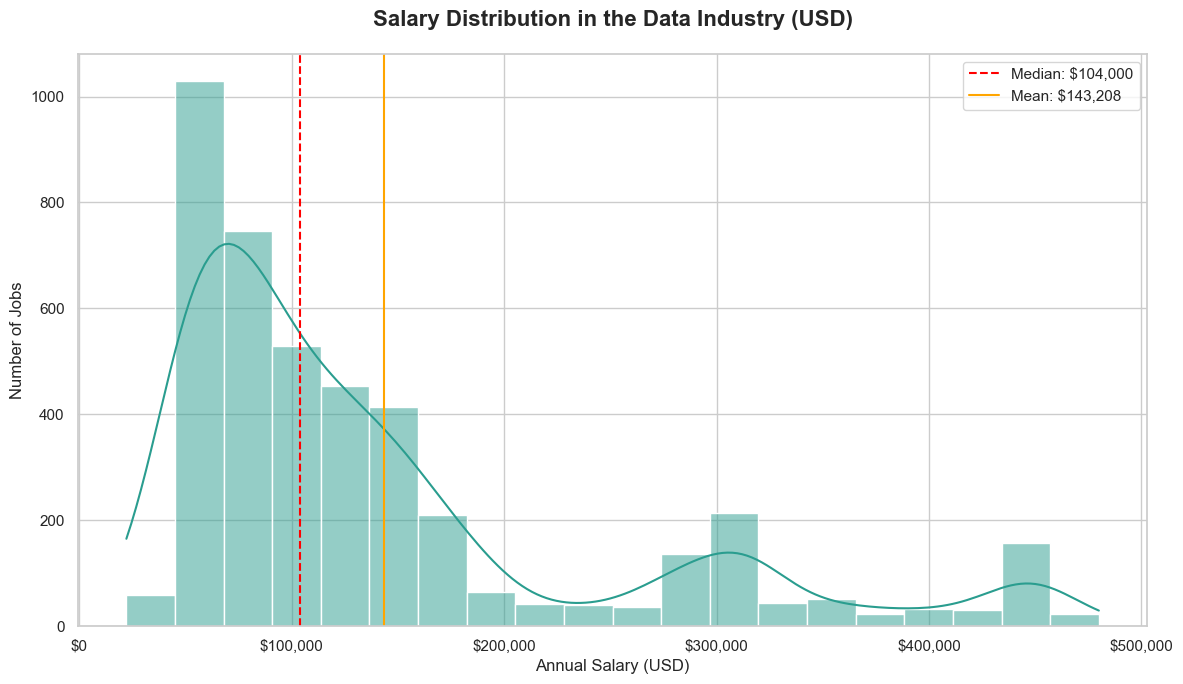

In [14]:
# STEP 4 (EDA1): DISTRIBUTION
# Step 4.1: Salary Distribution Histogram with KDE

# 4.1.1. Filter data to include only non-null salary records
salary_data = df[df['avg_salary_usd'].notnull()]

# 4.1.2. Set the visual theme
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# 4.1.3. Create Histogram with Kernel Density Estimate (KDE)
# This shows the shape of the distribution
sns.histplot(salary_data['avg_salary_usd'], kde=True, color='#2a9d8f', bins=20)

# 4.1.4. Add vertical lines for statistical context
# These lines help identify if the data is skewed
median_val = salary_data['avg_salary_usd'].median()
mean_val = salary_data['avg_salary_usd'].mean()

plt.axvline(median_val, color='red', linestyle='--', label=f'Median: ${median_val:,.0f}')
plt.axvline(mean_val, color='orange', linestyle='-', label=f'Mean: ${mean_val:,.0f}')

# 4.1.5. Add Titles and Labels
plt.title('Salary Distribution in the Data Industry (USD)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Annual Salary (USD)', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.legend()

# 4.1.6. Format the X-axis to show currency
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

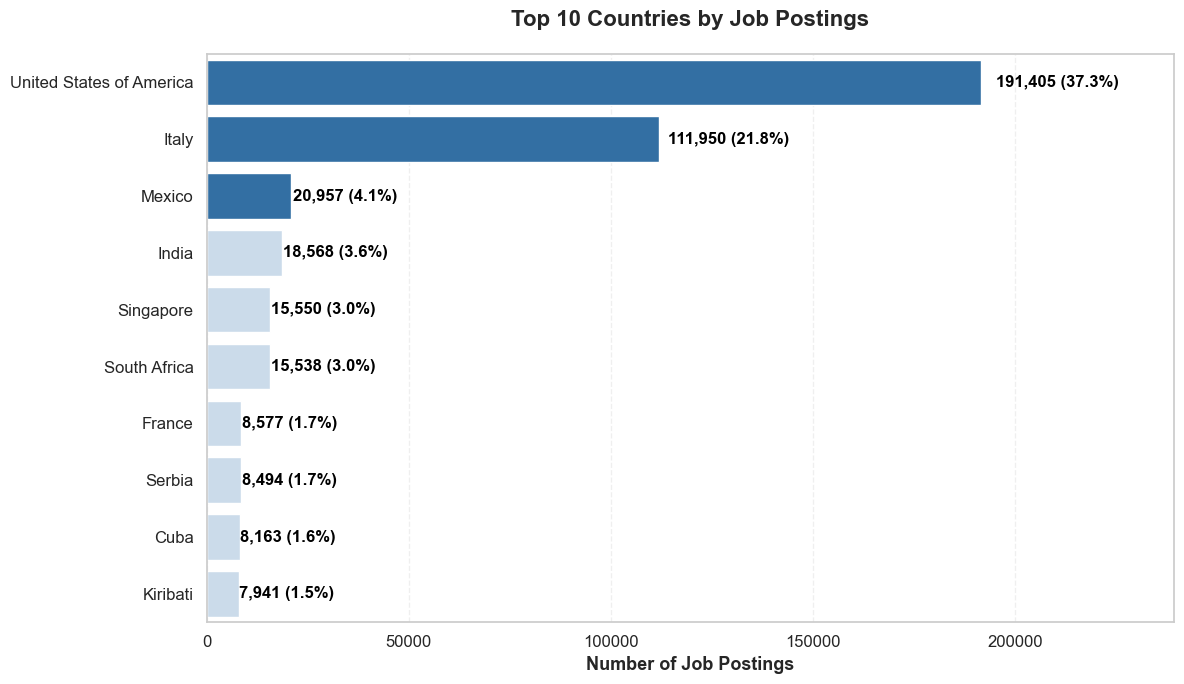

In [15]:
# STEP 5 (EDA1): PAIN PLOT / TOP PLOTS
# Step 5.1: Top 10 Countries by Job Postings

# 5.1.1. Clear previous figures
plt.close('all')

# 5.1.2. Top 10 countries
top_10_df = df['country'].value_counts().head(10).reset_index()
top_10_df.columns = ['Country', 'JobCount']

top_10_df['Country'] = top_10_df['Country'].astype(str)

# 5.1.3. Percentage
total_jobs = len(df)
top_10_df['Pct'] = (top_10_df['JobCount'] / total_jobs) * 100

# 5.1.4. Plot
plt.figure(figsize=(12, 7))

# Professional colors
base_color = '#C6DBEF'
highlight_color = '#2171B5'

bar_colors = (
	[highlight_color] * 3 +
	[base_color] * (len(top_10_df) - 3)
)

sns.barplot(
	data=top_10_df,
	x='JobCount',
	y='Country',
	hue='Country', 
	palette=bar_colors
)

# 5.1.5. Labels (Count + %)
for i, row in top_10_df.iterrows():
	label = f"{int(row['JobCount']):,} ({row['Pct']:.1f}%)"
	plt.text(
		row['JobCount'] * 1.02,
		i,
		label,
		va='center',
		fontsize=12,
		fontweight='bold',
		color='black'
	)

plt.title(
	'Top 10 Countries by Job Postings',
	fontsize=16,
	fontweight='bold',
	pad=20
)

plt.xlabel(
	'Number of Job Postings',
	fontsize=13,
	fontweight='bold'
)

plt.ylabel('')
plt.xlim(0, top_10_df['JobCount'].max() * 1.25)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

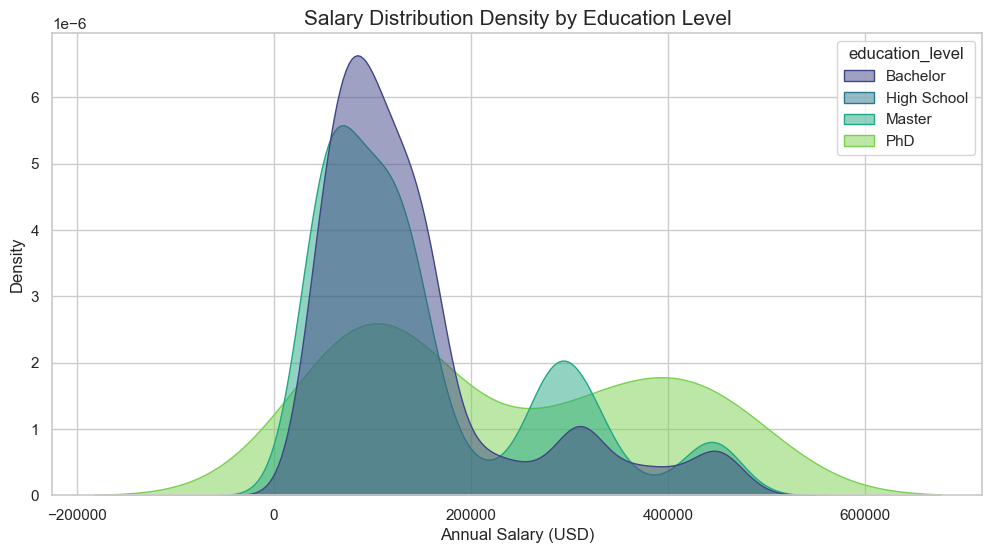

In [16]:
# STEP 5 (EDA1): PAIN PLOT / TOP PLOTS
# Step 5.2: Salary Density by Education Level

# Filter for rows that have both salary and education level
df_edu = df[df['avg_salary_usd'].notnull() & df['education_level'].notnull()]

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_edu, x='avg_salary_usd', hue='education_level', fill=True, common_norm=False, palette='viridis', alpha=.5, warn_singular=False)

plt.title('Salary Distribution Density by Education Level', fontsize=15)
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Density')
plt.show()

In [17]:
# 👉 Nguyên nhân:
# KDE là ước lượng mật độ
# Kernel smoothing bị leak ra ngoài miền dữ liệu
# Nhất là khi:
# Distribution skew mạnh
# Có outlier
# 💡 Đây KHÔNG PHẢI lỗi data
# CÂU GIẢI THÍCH CHUẨN
# Giá trị âm trong biểu đồ KDE là artefact của phương pháp ước lượng mật độ và không phản ánh các mức lương thực tế âm trong dữ liệu.

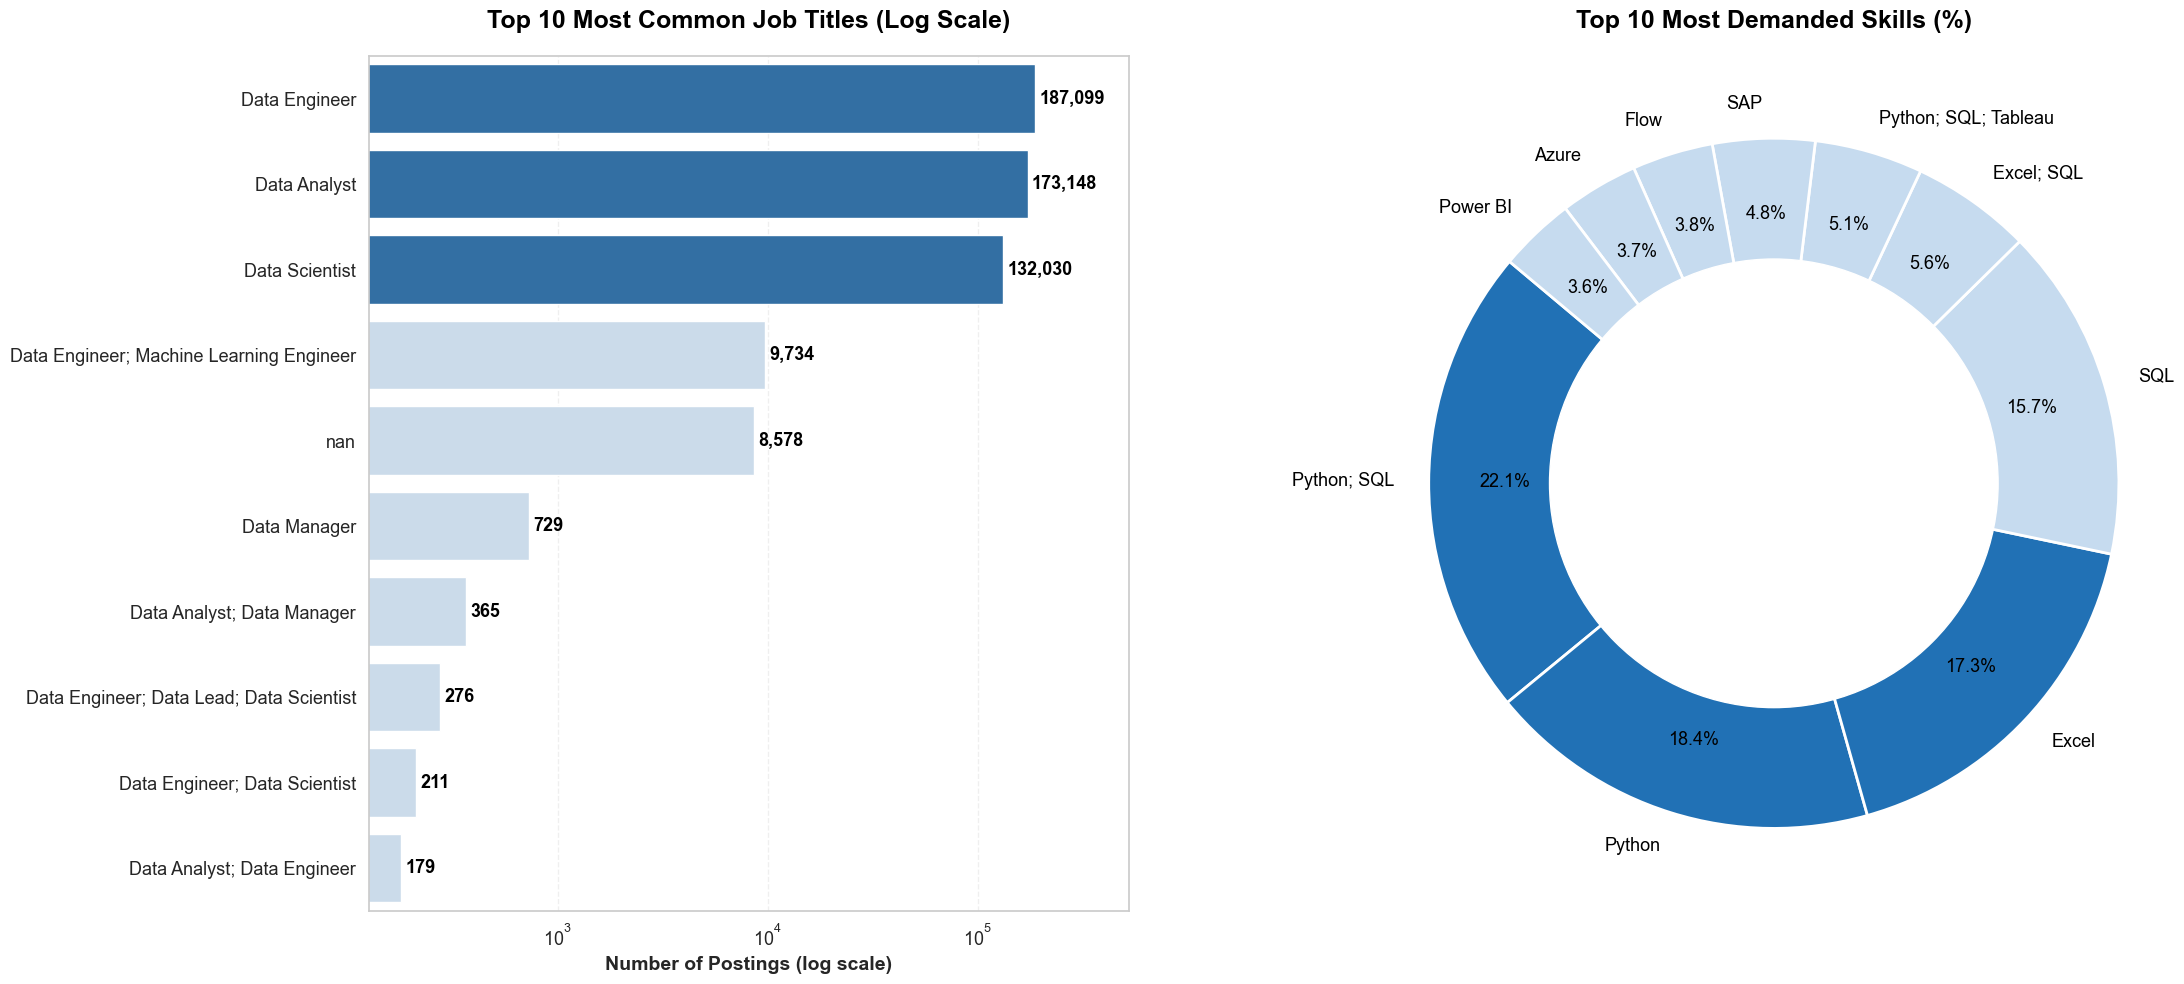

In [18]:
# # EDA STEP 5: CORRELATION
# Step 5.3: Top Skills & Job Titles Visualization

# ===============================
# Step 5.3.1. DATA PROCESSING
# ===============================
# -------- Skills --------
all_skills_list = []
df['skill_name'].dropna().apply(
	lambda x: all_skills_list.extend(
		[s.strip() for s in str(x).split(',') if s.strip().lower() != 'nan']
	)
)

skills_df = pd.DataFrame(
	Counter(all_skills_list).most_common(10),
	columns=['Skill', 'Count']
)

# Convert to percentage
skills_df['Percentage'] = skills_df['Count'] / skills_df['Count'].sum() * 100


# -------- Job Titles --------
all_titles_list = []
df['role_name'].dropna().apply(
	lambda x: all_titles_list.extend(
		[t.strip() for t in str(x).split(',') if t.strip()]
	)
)

jobs_df = pd.DataFrame(
	Counter(all_titles_list).most_common(10),
	columns=['Role', 'Count']
)

# ===============================
# Step 5.3.2. PLOTTING
# ===============================
fig, axes = plt.subplots(1, 2, figsize=(22, 10))

# ---- Colors (Professional) ----
title_color = '#1F4E79'
base_color = '#C6DBEF'
highlight_color = '#2171B5'

# ===============================
# LEFT: JOB TITLES (BAR - LOG)
# ===============================

job_colors = (
	[highlight_color] * 3 +
	[base_color] * (len(jobs_df) - 3)
)

sns.barplot(
	data=jobs_df,
	y='Role',
	x='Count',
	hue='Role',
	ax=axes[0],
	palette=job_colors
)

axes[0].set_xscale('log')
axes[0].set_xlim(right=jobs_df['Count'].max() * 2.8)

axes[0].set_title(
	'Top 10 Most Common Job Titles (Log Scale)',
	fontsize=18,
	fontweight='bold',
	color='black',
	pad=20
)

axes[0].set_xlabel(
	'Number of Postings (log scale)',
	fontsize=14,
	fontweight='bold'
)

axes[0].set_ylabel('')  # REMOVE "Role"
axes[0].tick_params(axis='both', labelsize=13)
axes[0].grid(axis='x', linestyle='--', alpha=0.3)

# Value labels
for i, value in enumerate(jobs_df['Count']):
	axes[0].text(
		value * 1.05,
		i,
		f'{value:,.0f}',
		va='center',
		ha='left',
		fontsize=13,
		fontweight='bold',
		color='black'
	)
	
# ===============================
# RIGHT: SKILLS (DONUT - %)
# ===============================

skill_colors = (
	[highlight_color] * 3 +
	[base_color] * (len(skills_df) - 3)
)

wedges, texts, autotexts = axes[1].pie(
	skills_df['Percentage'],
	labels=skills_df['Skill'],
	autopct='%1.1f%%',
	startangle=140,
	colors=skill_colors,
	pctdistance=0.78,
	wedgeprops={'edgecolor': 'white', 'linewidth': 2},
	textprops={'fontsize': 13, 'color': 'black'}
)

# Donut hole
centre_circle = plt.Circle((0, 0), 0.65, fc='white')
axes[1].add_artist(centre_circle)

axes[1].set_title(
	'Top 10 Most Demanded Skills (%)',
	fontsize=18,
	fontweight='bold',
	color='black',
	pad=20
) 

axes[1].axis('equal')

# ===============================
# LAYOUT
# ===============================

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

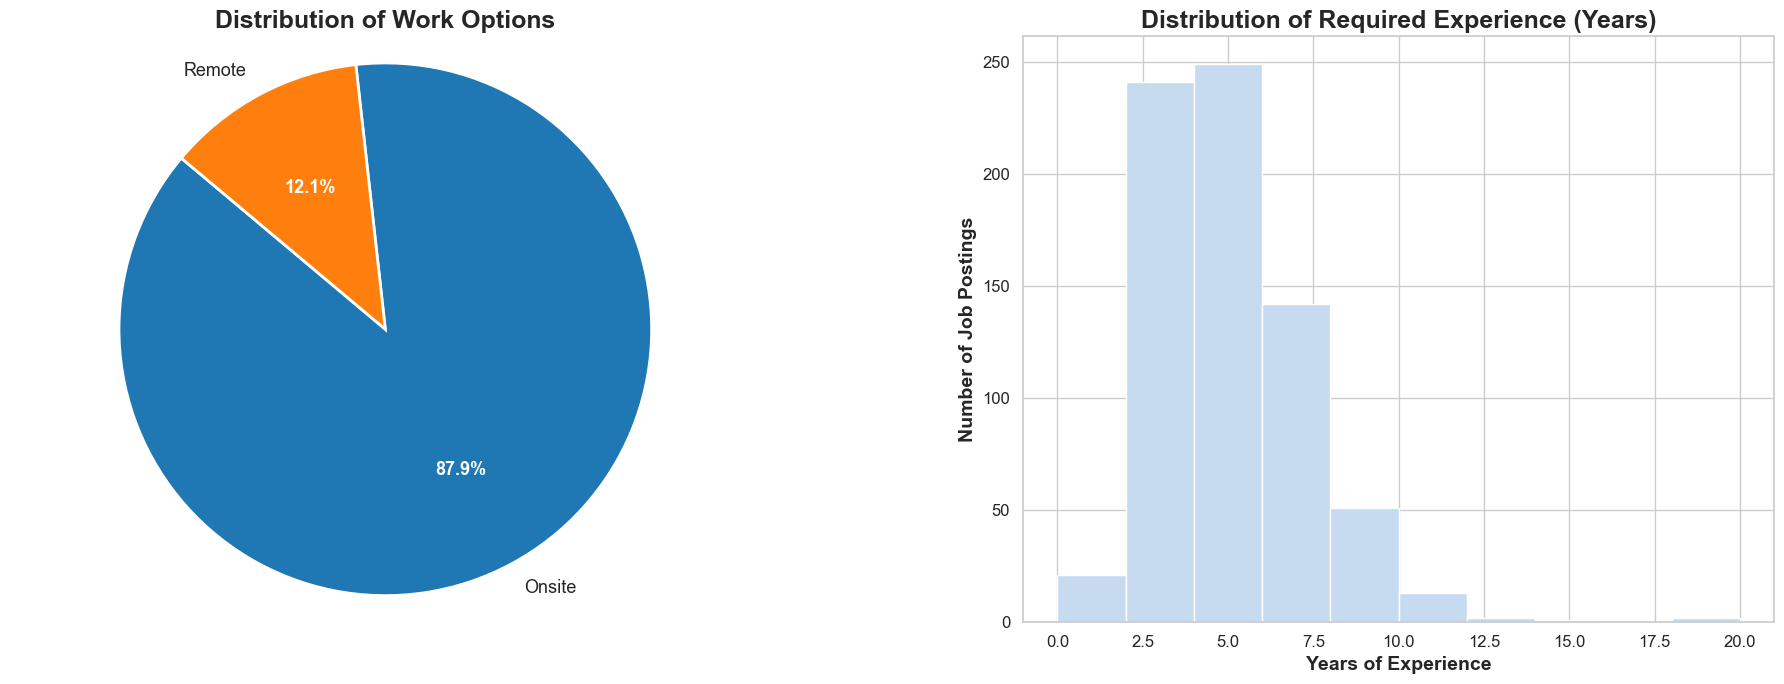

In [19]:
# EDA STEP 5: CORRELATION
# Step 5.4: Remote Options & Experience Distribution
# --- 1. Data Processing ---
# Remote option (percentage)
remote_df = (
	df['remote_option']
	.dropna()
	.value_counts(normalize=True)
	.mul(100)
	.reset_index()
)
remote_df.columns = ['Remote Option', 'Percentage']

# Required experience years
exp_df = df['required_exp_years'].dropna()

# 11.2. Plotting

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# ===== LEFT: Remote Option (Pie Chart) =====
colors = sns.color_palette('tab10', n_colors=len(remote_df))

wedges, texts, autotexts = axes[0].pie(
	remote_df['Percentage'],
	labels=remote_df['Remote Option'],
	autopct='%1.1f%%',
	startangle=140,
	colors=colors,
	wedgeprops={'edgecolor': 'white', 'linewidth': 2},
	textprops={'fontsize': 13}   # bigger label text
)

# Make percentage text white & bold (contrast on dark colors)
for autotext in autotexts:
	autotext.set_color('white')
	autotext.set_fontweight('bold')
	autotext.set_fontsize(13)

axes[0].set_title(
	'Distribution of Work Options',
	fontsize=18,
	fontweight='bold'
)
axes[0].axis('equal')

# ===== RIGHT: Required Experience Years (Histogram) =====
axes[1].hist(
	exp_df,
	bins=10,
	color='#C6DBEF',        # light blue
	edgecolor='white'
)

axes[1].set_title(
	'Distribution of Required Experience (Years)',
	fontsize=18,
	fontweight='bold'
)
axes[1].set_xlabel(
	'Years of Experience',
	fontsize=14,
	fontweight='bold'
)
axes[1].set_ylabel(
	'Number of Job Postings',
	fontsize=14,
	fontweight='bold'
)

# Increase tick label size
axes[1].tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

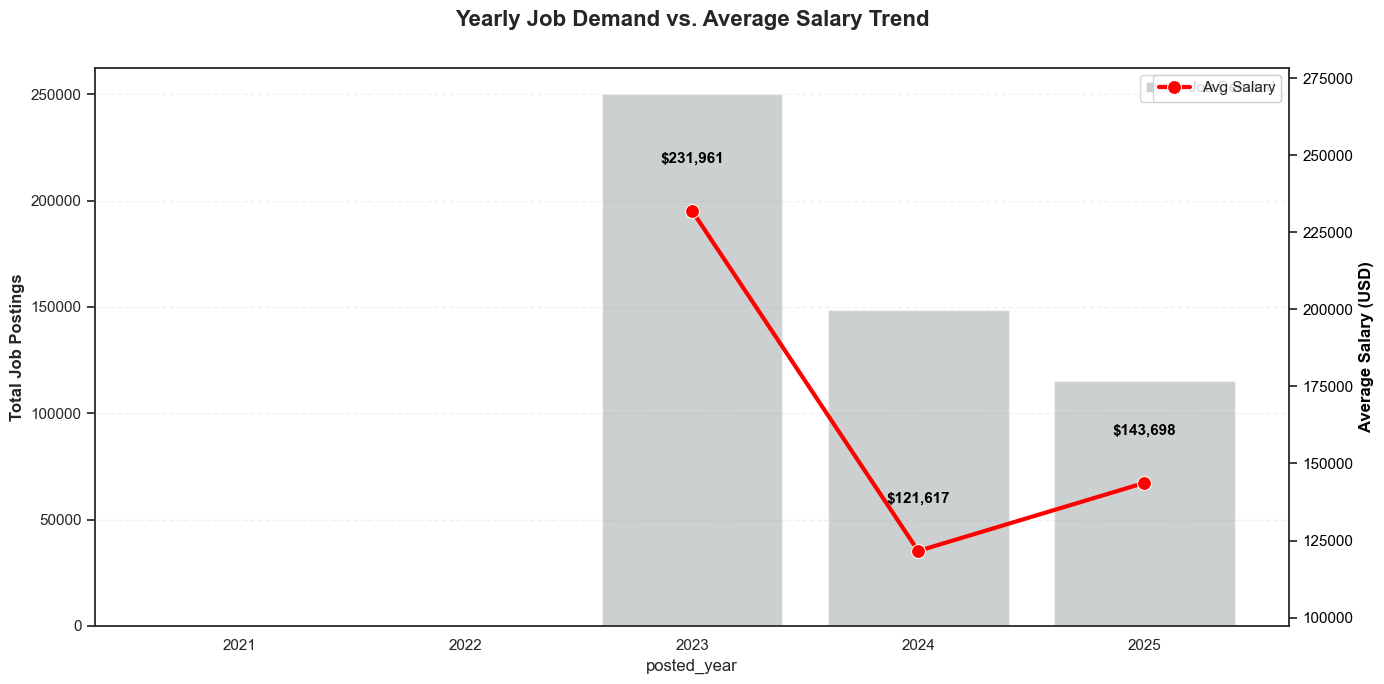

In [20]:
# EDA STEP 5: CORRELATION
# 5.5 Yearly Job Demand vs Average Salary Trend

df['posted_year'] = pd.to_datetime(df['posted_date']).dt.year

# 12.1. Data Preparation
yearly_data = df.groupby('posted_year').agg(
	job_count=('avg_salary_usd', 'size'),
	avg_salary=('avg_salary_usd', 'mean')
).reset_index()

# Convert year to string to ensure categorical spacing on bar chart
yearly_data['posted_year'] = yearly_data['posted_year'].astype(str)

# 12.2. Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))
sns.set_style("white")

# --- Bar Chart: Job Demand (Left Axis) ---
sns.barplot(data=yearly_data, x='posted_year', y='job_count',
			alpha=0.4, color='#7f8c8d', ax=ax1, label='Job Demand')

ax1.set_title('Yearly Job Demand vs. Average Salary Trend', fontsize=16, pad=30, fontweight='bold')
ax1.set_ylabel('Total Job Postings', fontsize=12, fontweight='bold')

# --- Line Chart: Average Salary (Right Axis) ---
ax2 = ax1.twinx()
# FIX: Use 'posted_year' directly for x-axis to match the bar chart
sns.lineplot(data=yearly_data, x='posted_year', y='avg_salary',
			 marker='o', markersize=10, color='red', linewidth=3, ax=ax2, label='Avg Salary')

ax2.set_ylabel('Average Salary (USD)', fontsize=12, color='black', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='black')

# 12.3. Adding Dynamic Value Labels
for i, row in yearly_data.iterrows():
	ax2.annotate(f'${row["avg_salary"]:,.0f}',
				 (i, row["avg_salary"]),
				 textcoords="offset points",
				 xytext=(0, 35),
				 ha='center',
				 fontweight='bold',
				 color='black',
				 fontsize=11)

# Ensure labels are not cut off
ax2.set_ylim(yearly_data['avg_salary'].min() * 0.8, yearly_data['avg_salary'].max() * 1.2)

ax1.grid(axis='y', linestyle='--', alpha=0.3)
fig.tight_layout()
plt.show()

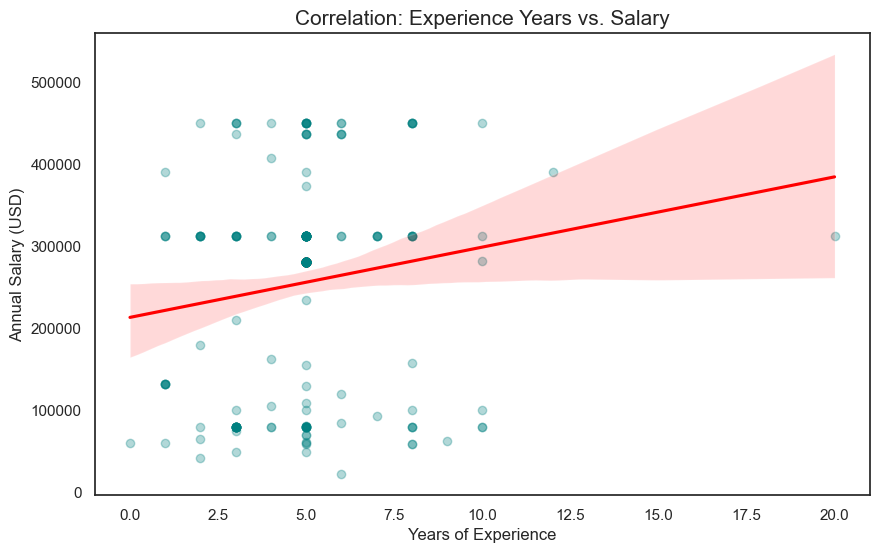

In [21]:
# EDA STEP 5: PAIN PLOT / TOP PLOTS
# Step 5.6: Experience vs. Salary Correlation

# Charts the relationship between years of experience and salary
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='required_exp_years', y='avg_salary_usd',
			scatter_kws={'alpha':0.3, 'color':'teal'}, line_kws={'color':'red'})

# Add title and labels
plt.title('Correlation: Experience Years vs. Salary', fontsize=15)
plt.xlabel('Years of Experience')
plt.ylabel('Annual Salary (USD)')
plt.show()

In [22]:
# Step 5.7: Map employment_type & remote_option to numeric 
df['employment_type_num'] = df['employment_type'].map({
	'Full-time': 3,
	'Internship': 0,
	'Temporary': 2,
	'Part-time': 1
})

df['work_type_num'] = df['remote_option'].map({
	'Onsite': 0,
	'Remote': 1
})

df['employment_type_num'] = df['employment_type_num'].fillna(0).astype(int)
df['work_type_num'] = df['work_type_num'].fillna(0).astype(int)

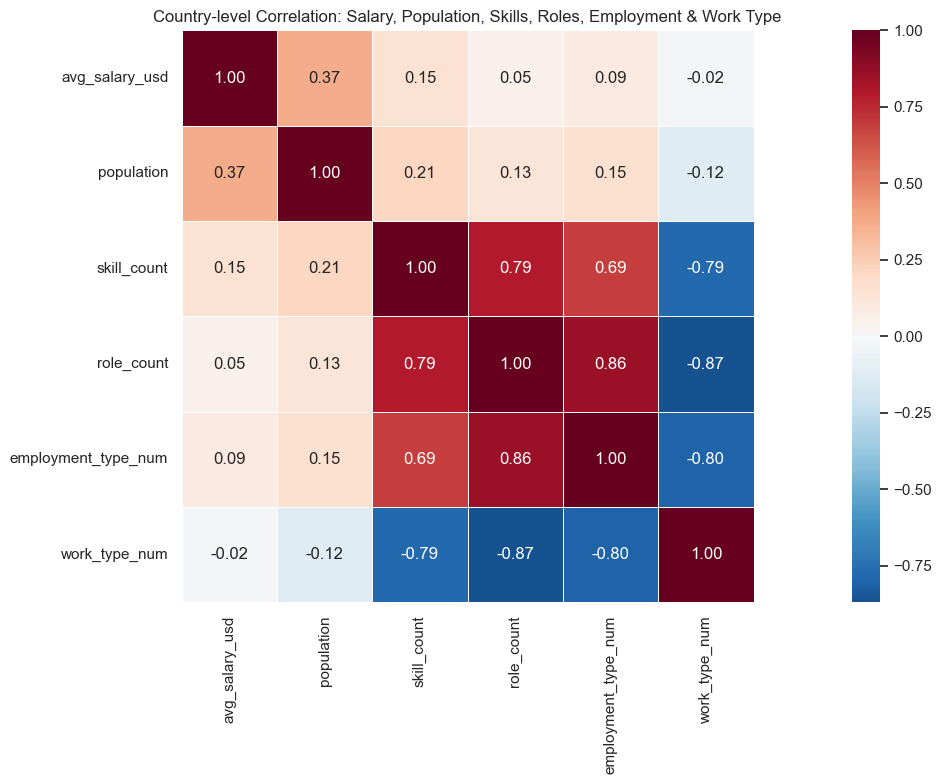

In [23]:
# EDA STEP 5: CORRELATION --> FIX 1/1
# Step 5.8: Country-level Correlation Heatmap

# 5.8.1. Item Counting Function
def count_items(text):
	if pd.isna(text) or str(text).strip() == "" or str(text).lower() in ['none', 'nan']:
		return 0
	return len([i.strip() for i in str(text).split(',') if i.strip() != ""])

# 5.8.2. Ensure Required Text Columns Exist
# Skills column
if 'skills' not in df.columns and 'skill_name' in df.columns:
	df['skills'] = df['skill_name'].astype(str).replace(['nan', 'None'], '')
elif 'skills' not in df.columns:
	df['skills'] = ""

# Role column
if 'role_name' in df.columns:
	df['role_name'] = df['role_name'].astype(str).replace(['nan', 'None'], '')
else:
	df['role_name'] = ""

# 5.8.3. Create count columns for heatmap
df['role_count'] = df['role_name'].apply(count_items)
df['skill_count'] = df['skills'].apply(count_items)

# 5.8.4. Convert critical columns to numeric (Ensuring avg_salary_usd is included)
numeric_fix_cols = [
	'avg_salary_usd',
	'population',
	'skill_count',
	'role_count',
	'employment_type_num',
	'work_type_num'
]

for col in numeric_fix_cols:
	if col in df.columns:
		df[col] = pd.to_numeric(df[col], errors='coerce')

# 5.8.5. Aggregate to Country Level
# Use observed=True to handle Categorical types correctly
df_country_stats = (
	df
	.groupby('country', observed=True)
	.agg(
		avg_salary_usd=('avg_salary_usd', 'median'),
		population=('population', 'first'),
		skill_count=('skill_count', 'mean'),
		role_count=('role_count', 'mean'),
		employment_type_num=('employment_type_num', 'mean'),
		work_type_num=('work_type_num', 'mean')
	)
	.reset_index()
)

# 5.8.6. Prepare Data for Correlation
corr_cols = [
	'avg_salary_usd',
	'population',
	'skill_count',
	'role_count',
	'employment_type_num',
	'work_type_num'
	]
df_country_stats = df_country_stats.dropna(subset=corr_cols)

# 5.8.7. Plot Correlation Heatmap
plt.figure(figsize=(20, 8))

country_corr = df_country_stats[corr_cols].corr()

sns.heatmap(
	country_corr,
	annot=True,
	cmap='RdBu_r',
	center=0,
	fmt=".2f",
	square=True,
	linewidths=0.5
	)

plt.title(
	'Country-level Correlation: Salary, Population, Skills, Roles, Employment & Work Type'
	)
plt.tight_layout()
plt.show()

### STEP 2: EDA LEVEL 2
#### - Exploratory Data Analysis (EDA) 
#### - Level 2: Relationships & Aggregation

In [24]:
# STEP 6 (EDA2): ANOVA
# Step 6.1: ANOVA Analysis Across Top 5 Countries

# 6.1.1. Prepare Data for ANOVA
df_filtered = df_filtered = df.dropna(subset=['avg_salary_usd'])

# Get Top 5 countries with the most salary data points for a valid test
top_countries = (
	df[df['avg_salary_usd'].notna()]
	['country']
	.value_counts()
	.head(5)
	.index
)
df_anova_base = df_filtered[df_filtered['country'].isin(top_countries)].copy()

# Ensure country is a string to avoid categorical index errors in statsmodels
df_anova_base['country'] = df_anova_base['country'].astype(str)

# 6.1.2. List of Metrics to test
factors_to_test = ['skill_count', 'avg_salary_usd', 'role_count']

print(f"=== ANOVA ANALYSIS REPORT: TOP 5 COUNTRIES ===")
print(f"Countries analyzed: {', '.join(top_countries)}\n")

for factor in factors_to_test:
	# 6.1.3. Clean data for the specific factor
	df_clean = df_anova_base.dropna(subset=[factor, 'country'])

	# Check if there's enough data (need at least some rows per country)
	if df_clean.empty or len(df_clean['country'].unique()) < 2:
		print(f"Skipping {factor}: Not enough data for comparison.\n")
		continue

	# 6.1.4. Build OLS Model and Run ANOVA
	# C(country) treats the country names as categorical groups
	try:
		formula = f'{factor} ~ C(country)'
		model = ols(formula, data=df_clean).fit()
		anova_table = sm.stats.anova_lm(model, typ=2)

		# 6.1.5. Business Format Display
		print(f"--- ANOVA RESULTS FOR: {factor.upper()} ---")

		p_val = anova_table['PR(>F)'].iloc[0]
		f_stat = anova_table['F'].iloc[0]

		print(f"F-statistic: {f_stat:.4f}")

		if p_val < 0.05:
			print(f"Result: STATISTICALLY SIGNIFICANT (P-value = {p_val:.4e})")
			print(
				f"Insight: There are statistically significant differences in "
				f"{factor} across countries."
			)
		else:
			print(f"Result: NOT SIGNIFICANT (P-value = {p_val:.4f})")
			print(f"Insight: No strong evidence that Country affects {factor}.")

		display(anova_table)
		print("-" * 50)
	except Exception as e:
		print(f"Error analyzing {factor}: {e}")

=== ANOVA ANALYSIS REPORT: TOP 5 COUNTRIES ===
Countries analyzed: United States of America, Kiribati, United Kingdom, Mexico, Russia

--- ANOVA RESULTS FOR: SKILL_COUNT ---
F-statistic: 87.0760
Result: STATISTICALLY SIGNIFICANT (P-value = 1.1066e-70)
Insight: There are statistically significant differences in skill_count across countries.


,sum_sq,df,F,PR(>F)
C(country),24.923933,4.0,87.075971,1.106604e-70
Residual,254.818075,3561.0,NaN,NaN


--------------------------------------------------
--- ANOVA RESULTS FOR: AVG_SALARY_USD ---
F-statistic: 350.1744
Result: STATISTICALLY SIGNIFICANT (P-value = 1.6079e-254)
Insight: There are statistically significant differences in avg_salary_usd across countries.


,sum_sq,df,F,PR(>F)
C(country),9.103217e+12,4.0,350.174443,1.607891e-254
Residual,2.314315e+13,3561.0,NaN,NaN


--------------------------------------------------
--- ANOVA RESULTS FOR: ROLE_COUNT ---
F-statistic: 8.8415
Result: STATISTICALLY SIGNIFICANT (P-value = 4.2236e-07)
Insight: There are statistically significant differences in role_count across countries.


,sum_sq,df,F,PR(>F)
C(country),1.847714,4.0,8.841454,4.223558e-07
Residual,186.047127,3561.0,NaN,NaN


--------------------------------------------------


In [25]:
# Check DataFrame
df

,job_id,company_id,location_id,posted_date,min_salary,max_salary,currency,required_exp_years,education_level,employment_type,job_description,remote_option,company_name,company_size,industry,city,country,country_iso,latitude,longitude,population,role_name,job_level,skill_name,skill_id,skill_category,role_id,ex_rate,min_salary_usd,max_salary_usd,avg_salary_usd,posted_year,employment_type_num,work_type_num,skills,role_count,skill_count
0,12745,1710,625,2021-11-30,NaN,NaN,None,5.0,Bachelor,Full-time,Contract Jobs - Longterm f...,Remote,StackNexus,NaN,Manufacturing,Hyderabad,Pakistan,PK,29.973460,69.413998,2.165653e+08,Data Engineer,NaN,Azure,7,Cloud,6,1.0,NaN,NaN,NaN,2021,3,1,Azure,1,1
1,12755,1717,621,2021-04-17,NaN,NaN,None,NaN,Master,Full-time,Job description Position: ...,Remote,BYGRAD,NaN,Technology,Bengaluru,India,IN,22.925006,79.593704,1.366418e+09,Data Scientist,Senior,nan,nan,nan,5,1.0,NaN,NaN,NaN,2021,3,1,,1,0
2,5371,708,194,2022-12-01,NaN,NaN,None,NaN,NaN,Full-time,Job Title: Data Engineer D...,Remote,Two95 International Inc.,NaN,Technology,San Antonio Canada,Mexico,MX,23.935372,-102.576350,1.275755e+08,Data Engineer,NaN,Python,9,Programming,6,1.0,NaN,NaN,NaN,2022,3,1,Python,1,1
3,12788,1740,622,2022-10-13,NaN,NaN,None,NaN,Bachelor,Full-time,we are hiring for valuelab...,Remote,Saiva System,NaN,Technology,Mumbai,India,IN,22.925006,79.593704,1.366418e+09,Data Engineer,Senior,nan,nan,nan,6,1.0,NaN,NaN,NaN,2022,3,1,,1,0
4,6366,776,22,2022-10-03,NaN,NaN,None,NaN,NaN,Part-time,Job Title: Data Entry Cler...,Remote,Apex Focus Group Inc.,NaN,Technology,Sidney,United States of America,US,45.705628,-112.599436,3.282395e+08,,NaN,nan,nan,nan,NaN,1.0,NaN,NaN,NaN,2022,1,1,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513468,512650,71560,640,2025-01-01,NaN,NaN,None,NaN,NaN,Temporary,NaN,Remote,"Suncap Technology, Inc.",NaN,NaN,NaN,Italy,IT,42.751183,12.140788,6.029740e+07,Data Scientist,NaN,Azure; Excel; Power BI; Py...,2; 3; 39; 42; 45; 5; 7; 9,Analytics; Cloud; Database...,5,1.0,NaN,NaN,NaN,2025,2,1,Azure; Excel; Power BI; Py...,1,1
513469,512715,25070,450,2025-01-01,NaN,NaN,None,NaN,NaN,Full-time,NaN,Onsite,Exotec,NaN,Technology,Lille,France,FR,46.227638,2.213749,6.777400e+07,Data Engineer,NaN,nan,nan,nan,6,1.0,NaN,NaN,NaN,2025,3,0,,1,0
513470,512772,4340,960,2025-01-01,NaN,NaN,None,NaN,NaN,Full-time,NaN,Onsite,ApTask,NaN,NaN,Tampa,United States of America,US,45.705628,-112.599436,3.282395e+08,Data Scientist,NaN,Flow; Keras; PyTorch,47; 62; 81,Data Engineering; Machine ...,5,1.0,NaN,NaN,NaN,2025,3,0,Flow; Keras; PyTorch,1,1
513471,512774,85949,942,2025-01-01,NaN,NaN,None,NaN,NaN,Full-time,NaN,Onsite,Jobtech,NaN,NaN,Canal Fulton,United States of America,US,45.705628,-112.599436,3.282395e+08,Data Analyst,NaN,SQL; Tableau,3; 39,Database; Visualization,1,1.0,NaN,NaN,NaN,2025,3,0,SQL; Tableau,1,1


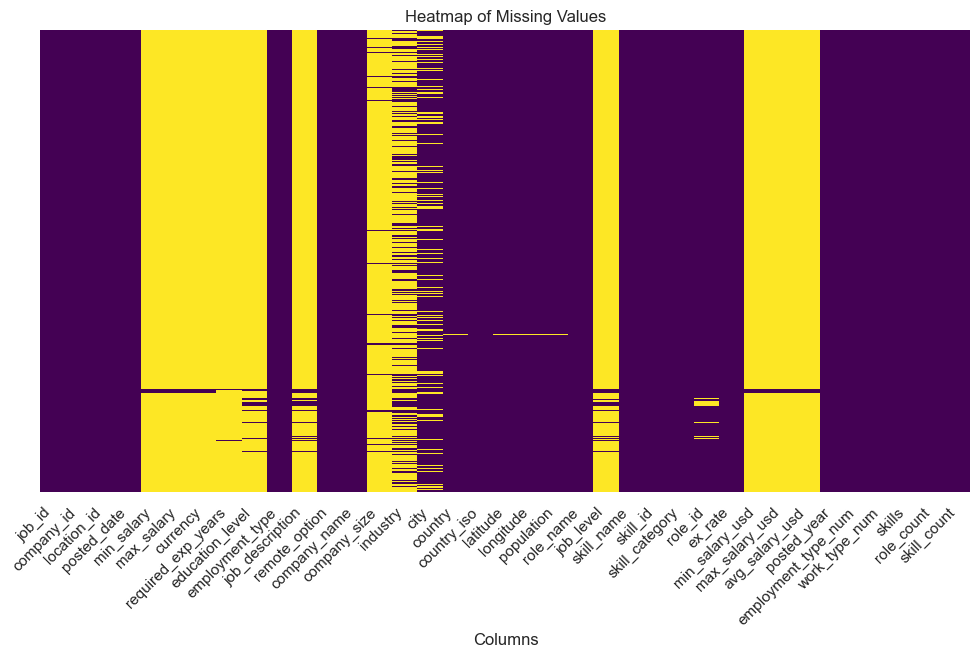

In [26]:
# STEP 7 (EDA2): Z-SCORE ANALYSIS
# Step 7.1: Check Data

plt.figure(figsize=(12, 6))

sns.heatmap(
	df.isnull(),
	cbar=False,
	yticklabels=False,
	cmap='viridis'
)

plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=45, ha='right')
plt.show()

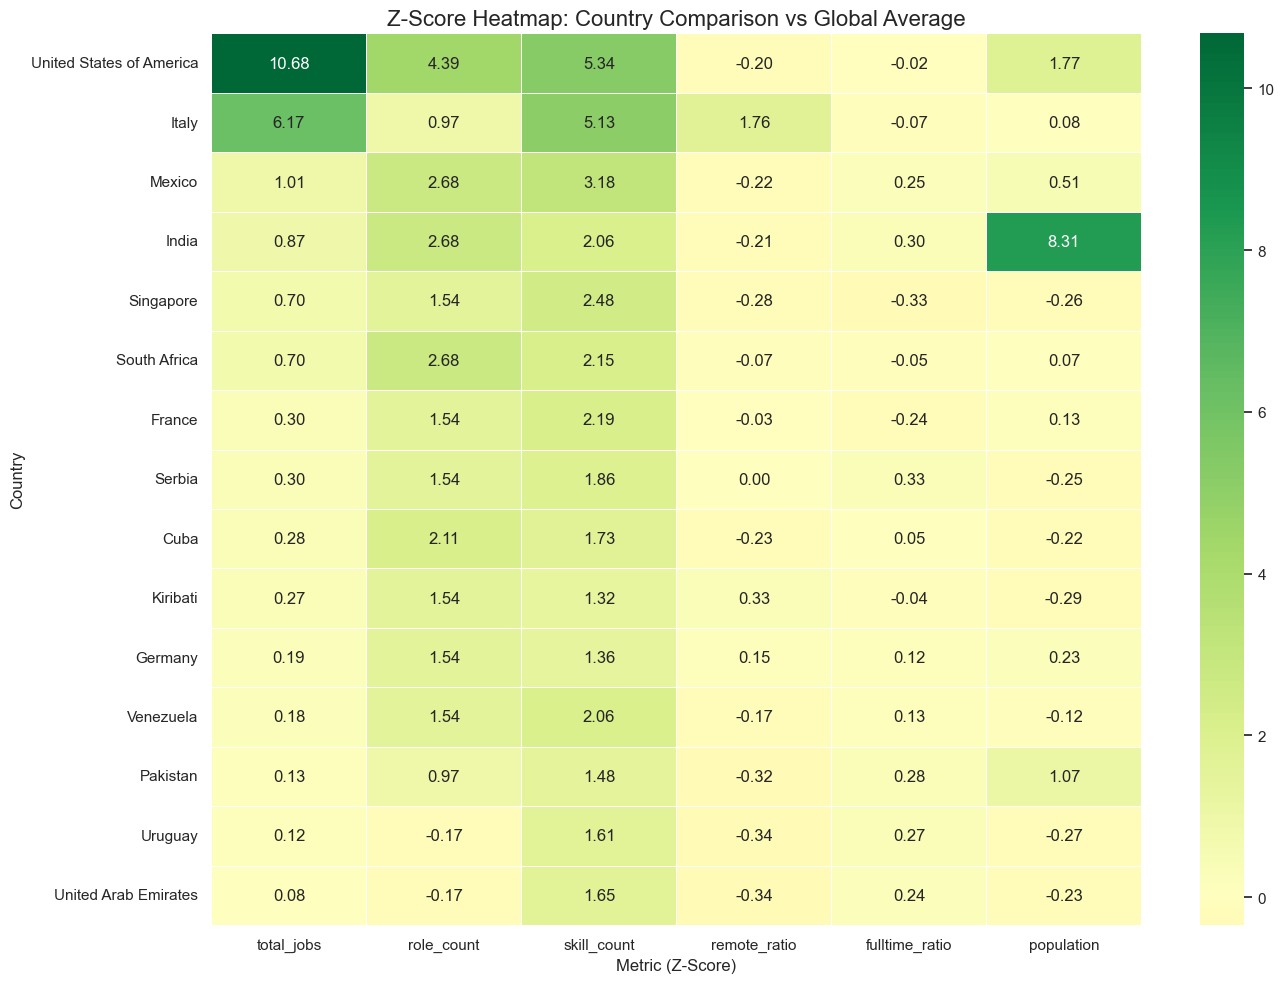

In [27]:
# STEP 7: Z-SCORE ANALYSIS
# Step 7.2: Normalize list columns role_id and skill_id

# ==============================
# CLEAN LIST COLUMNS (ROBUST)
# ==============================
def normalize_to_list(x):
	if isinstance(x, list):
		return x
	if isinstance(x, (int, float)) and not pd.isna(x):
		return [x]
	if isinstance(x, str):
		try:
			val = ast.literal_eval(x)
			return val if isinstance(val, list) else [val]
		except:
			return []
	return []

df['role_id'] = df['role_id'].apply(normalize_to_list)
df['skill_id'] = df['skill_id'].apply(normalize_to_list)

# ==============================
# ENSURE NUMERIC
# ==============================
df['work_type_num'] = df['work_type_num'].astype(int)
df['employment_type_num'] = df['employment_type_num'].astype(int)

# Step 7.3: Aggregate metrics by country
# COUNTRY AGGREGATION
# ==============================
df_country_stats = (
	df
	.groupby('country', observed=False)
	.agg(
		total_jobs=('job_id', 'count'),
		role_count=('role_id',
					lambda x: len(set(i for sub in x for i in sub))),
		skill_count=('skill_id',
					 lambda x: len(set(i for sub in x for i in sub))),
		remote_ratio=('work_type_num', 'mean'),
		fulltime_ratio=('employment_type_num', lambda x: (x == 3).mean()),
		population=('population', 'first')
	)
	.reset_index()
	)

# Step 7.4: Compute Z-scores
# Z-SCORE
# ==============================
cols_to_zscore = [
	'total_jobs',
	'role_count',
	'skill_count',
	'remote_ratio',
	'fulltime_ratio',
	'population'
	]

df_zscore = (
	df_country_stats
	.set_index('country')[cols_to_zscore]
	.apply(zscore, nan_policy='omit')
)

# ==============================
# FILTER & SORT
# ==============================
df_zscore = df_zscore[
	df_country_stats.set_index('country')['total_jobs'] > 5
	]

df_zscore_top = (
	df_zscore
	.sort_values('total_jobs', ascending=False)
	.head(15)
	)

# Step 7.5: Visualize Z-score heatmap
# HEATMAP
# ==============================
plt.figure(figsize=(14, 10))
sns.heatmap(
	df_zscore_top,
	annot=True,
	cmap='RdYlGn',
	center=0,
	fmt=".2f",
	linewidths=0.5
	)
plt.title('Z-Score Heatmap: Country Comparison vs Global Average', fontsize=16)
plt.xlabel('Metric (Z-Score)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### STEP 3: PCA
#### - Principal Component Analysis (PCA) 
#### - K-Means Clustering

In [28]:
# STEP 8: PCA and K-Means Clustering (Extended Country Market Analysis) --> FIX 1/1
# Step 8.0: Check Data
df['population_num'] = pd.to_numeric(df['population'], errors='coerce')

df_country_stats = df.groupby('country', observed=False).agg(
	total_jobs=('job_id', 'count'),
	role_count=('role_id', lambda x: len(set(i for sub in x for i in sub))),
	skill_count=('skill_id', lambda x: len(set(i for sub in x for i in sub))),
	remote_ratio=('work_type_num', 'mean'),
	fulltime_ratio=('employment_type_num', lambda x: (x == 3).mean()),
	population=('population_num', 'first')
).reset_index()

In [29]:
#total job, role count, skill count, remote ratio, fulltime ratio, population

In [30]:
# STEP 8: PCA and K-Means Clustering (Extended Country Market Analysis)
# Step 8.1: Categorical Mapping
# Map categorical columns to numeric for aggregation
df['employment_type_num'] = df['employment_type'].map({
	'Full-time': 3,
	'Internship': 0,
	'Temporary': 2,
	'Part-time': 1
})

df['work_type_num'] = df['remote_option'].map({
	'Onsite': 0,
	'Remote': 1
})

# Ensure numeric dtype
df['employment_type_num'] = df['employment_type_num'].astype(int)
df['work_type_num'] = df['work_type_num'].astype(int)
df_country_stats['job_density'] = df_country_stats['total_jobs'] / df_country_stats['population']

# ==============================
# Step 8.2: Select features for PCA
# ==============================
pca_features = [
	'total_jobs',
	'role_count',
	'skill_count',
	'remote_ratio',
	'fulltime_ratio',
	'population',
	'job_density'
]

X = df_country_stats[pca_features]

# ==============================
# Step 8.3: Standardize the features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# Step 8.4: Apply PCA (3 components)
# ==============================
pca = PCA(n_components=4, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Attach PCs to df_country_stats
df_country_stats['PC1'] = X_pca[:, 0]
df_country_stats['PC2'] = X_pca[:, 1]
df_country_stats['PC3'] = X_pca[:, 2]
df_country_stats['PC4'] = X_pca[:, 2]
# ==============================
# Step 8.5: Explained variance
# ==============================
explained_var = pca.explained_variance_ratio_

print(f"PC1 explains: {explained_var[0]*100:.2f}%")
print(f"PC2 explains: {explained_var[1]*100:.2f}%")
print(f"PC3 explains: {explained_var[2]*100:.2f}%")
print(f"PC4 explains: {explained_var[2]*100:.2f}%")
print(f"Total explained: {explained_var.sum()*100:.2f}%")

# ==============================
# Step 8.6: PCA loadings
# ==============================
loadings = pd.DataFrame(
	pca.components_.T,
	index=pca_features,
	columns=['PC1', 'PC2', 'PC3', 'PC4']
)

print("\nPCA Loadings:")
print(loadings)


PC1 explains: 34.39%
PC2 explains: 22.25%
PC3 explains: 14.64%
PC4 explains: 14.64%
Total explained: 83.02%

PCA Loadings:
                     PC1       PC2       PC3       PC4
total_jobs      0.503837  0.073500 -0.054560 -0.380299
role_count      0.532069  0.009103  0.040709 -0.026872
skill_count     0.593852  0.008683  0.027243 -0.145965
remote_ratio    0.006205  0.702563 -0.072607  0.000106
fulltime_ratio  0.068387 -0.695549  0.107319 -0.050453
population      0.281616 -0.075164 -0.539178  0.769674
job_density     0.162383  0.106804  0.828928  0.488263


In [31]:
# PC1 mainly captures job volume and skill diversity. Countries with high PC1 scores have many jobs, many roles, many skills.
# PC2 captures type of employment
# PC3 mostly reflects country population / market size, almost independent from job counts or work type.

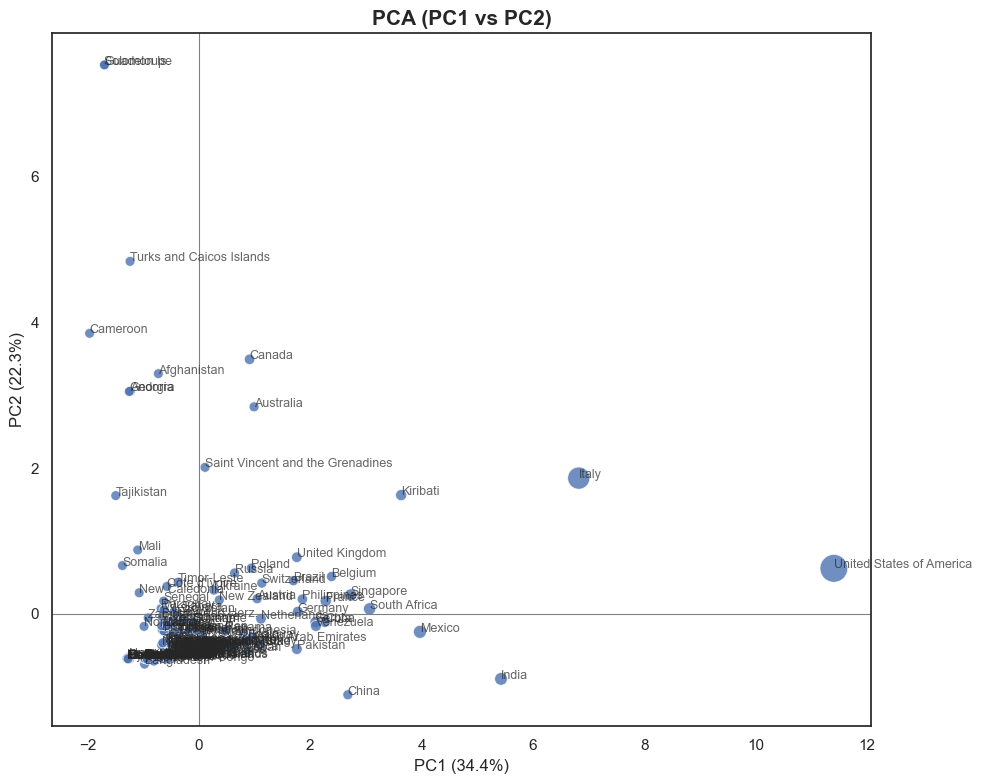

In [32]:
# ==============================
# Step 8.7: 2D PCA scatter plot (PC1 vs PC2)
# ==============================
plt.figure(figsize=(10, 8))

sns.scatterplot(
	data=df_country_stats,
	x='PC1',
	y='PC2',
	size='total_jobs',
	sizes=(50, 400),
	alpha=0.8,
	legend=False
)

for _, row in df_country_stats.iterrows():
	plt.text(
		row['PC1'],
		row['PC2'],
		row['country'],
		fontsize=9,
		alpha=0.7
	)

plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)

plt.title('PCA (PC1 vs PC2)', fontsize=15, fontweight='bold')
plt.xlabel(f'PC1 ({explained_var[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({explained_var[1]*100:.1f}%)')
plt.tight_layout()
plt.show()

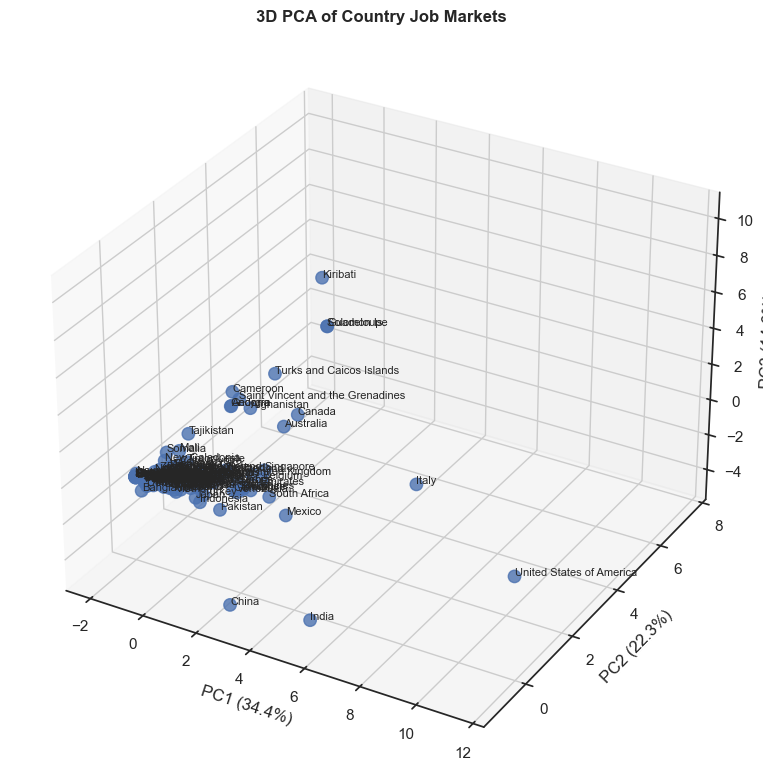

In [33]:
# ==============================
# Step 8.8: 3D PCA scatter plot (PC1, PC2, PC3)
# ==============================

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
	df_country_stats['PC1'],
	df_country_stats['PC2'],
	df_country_stats['PC3'],
	s=80,
	alpha=0.8
)

for _, row in df_country_stats.iterrows():
	ax.text(
		row['PC1'],
		row['PC2'],
		row['PC3'],
		row['country'],
		fontsize=8
	)

ax.set_xlabel(f'PC1 ({explained_var[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({explained_var[1]*100:.1f}%)')
ax.set_zlabel(f'PC3 ({explained_var[2]*100:.1f}%)')

ax.set_title('3D PCA of Country Job Markets', fontweight='bold')
plt.tight_layout()
plt.show()

In [34]:
# Check Columns
print(df.columns)

Index(['job_id', 'company_id', 'location_id', 'posted_date', 'min_salary',
       'max_salary', 'currency', 'required_exp_years', 'education_level',
       'employment_type', 'job_description', 'remote_option', 'company_name',
       'company_size', 'industry', 'city', 'country', 'country_iso',
       'latitude', 'longitude', 'population', 'role_name', 'job_level',
       'skill_name', 'skill_id', 'skill_category', 'role_id', 'ex_rate',
       'min_salary_usd', 'max_salary_usd', 'avg_salary_usd', 'posted_year',
       'employment_type_num', 'work_type_num', 'skills', 'role_count',
       'skill_count', 'population_num'],
      dtype='object')


PC1 explains: 34.39%
PC2 explains: 22.25%
PC3 explains: 14.64%
PC4 explains: 14.64%
Total explained: 83.02%


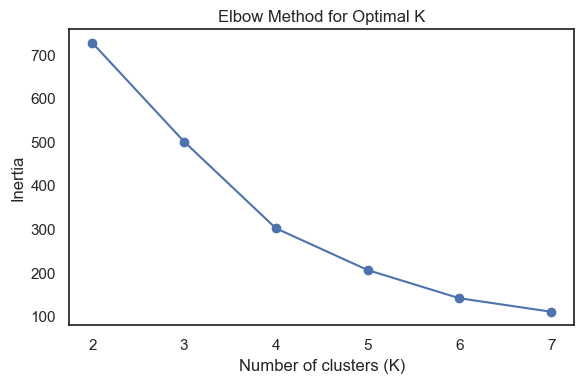

In [35]:
# STEP 8: PCA and K-Means Clustering (Extended Country Market Analysis)
# Step 8.9: Determine optimal clusters using Elbow Method

# Step 8.9.1: Select features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4, random_state=42)
X_pca = pca.fit_transform(X_scaled)
df_country_stats['PC1'] = X_pca[:, 0]
df_country_stats['PC2'] = X_pca[:, 1]
df_country_stats['PC3'] = X_pca[:, 2]
df_country_stats['PC4'] = X_pca[:, 2]

explained_var = pca.explained_variance_ratio_
print(f"PC1 explains: {explained_var[0]*100:.2f}%")
print(f"PC2 explains: {explained_var[1]*100:.2f}%")
print(f"PC3 explains: {explained_var[2]*100:.2f}%")
print(f"PC4 explains: {explained_var[2]*100:.2f}%")
print(f"Total explained: {explained_var.sum()*100:.2f}%")

#ELBOW
X_cluster = df_country_stats[['PC1', 'PC2', 'PC3', 'PC4']]

inertia = []
K_range = range(2, 8)

for k in K_range:
	km = KMeans(n_clusters=k, random_state=42, n_init=10)
	km.fit(X_cluster)
	inertia.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.tight_layout()
plt.show()

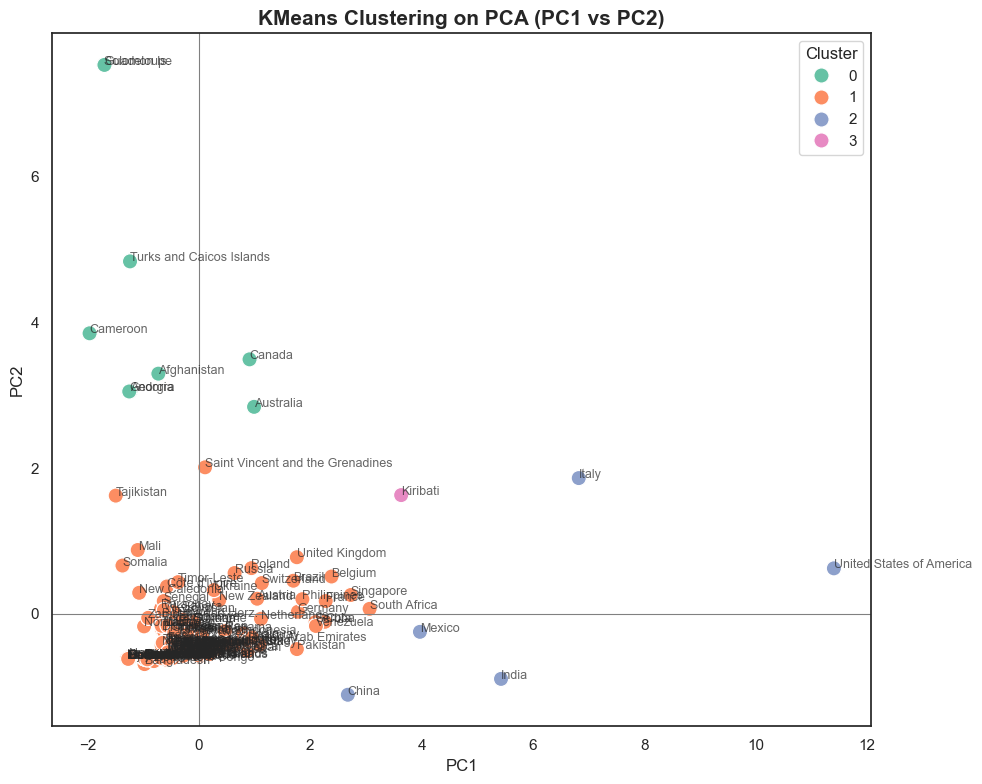

In [36]:
# Step 8.10: K-Means clustering on PCA components
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_country_stats['cluster'] = kmeans.fit_predict(X_cluster)

#Step 8.11: 2D PCA + Clusters visualization
plt.figure(figsize=(10, 8))

sns.scatterplot(
	data=df_country_stats,
	x='PC1',
	y='PC2',
	hue='cluster',
	palette='Set2',
	s=120
)

for _, row in df_country_stats.iterrows():
	plt.text(
		row['PC1'],
		row['PC2'],
		row['country'],
		fontsize=9,
		alpha=0.7
	)

plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)

plt.title('KMeans Clustering on PCA (PC1 vs PC2)', fontsize=15, fontweight='bold')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

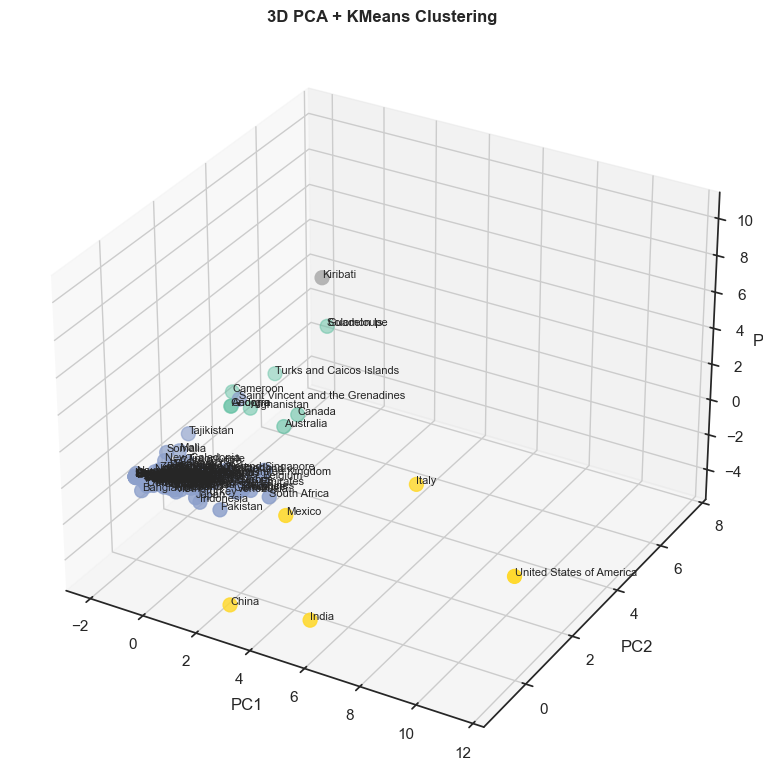

In [37]:
# STEP 8: PCA and K-Means Clustering (Extended Country Market Analysis)
# Step 8.12: 3D PCA + Clusters visualization

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
	df_country_stats['PC1'],
	df_country_stats['PC2'],
	df_country_stats['PC3'],
	c=df_country_stats['cluster'],
	cmap='Set2',
	s=100
)

for _, row in df_country_stats.iterrows():
	ax.text(
		row['PC1'],
		row['PC2'],
		row['PC3'],
		row['country'],
		fontsize=8
	)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA + KMeans Clustering', fontweight='bold')

plt.tight_layout()
plt.show()

### STEP 4: PREDICTIVE MODELING (MACHINE LEARNING)
#### - Problem Definition & Target Variable 
#### - Feature Engineering & Encoding
#### - Model Selection (Based on PCA & EDA)

In [38]:
'''
(0) Define target (salary)

(1) Feasibility Check – LEVEL 0 (MODEL-AGNOSTIC)
	↓
(2) Model Family Suggestion (suggest_model)
	↓
(3) Feasibility Check – LEVEL 1 (MODEL-SPECIFIC)
	↓
(4) Train + Validate
'''

'\n(0) Define target (salary)\n\n(1) Feasibility Check – LEVEL 0 (MODEL-AGNOSTIC)\n\t↓\n(2) Model Family Suggestion (suggest_model)\n\t↓\n(3) Feasibility Check – LEVEL 1 (MODEL-SPECIFIC)\n\t↓\n(4) Train + Validate\n'

=== STEP 9.1: TARGET DEFINITION & FEASIBILITY CHECK ===
Loading data from: d:\Work_Study\IT\Data\Projects\data_industry_insights\data_industry_insights\analysis\data\final_jobs_500k.csv
Data shape: (513473, 27)
Available columns:
 - job_id
 - company_id
 - location_id
 - posted_date
 - min_salary
 - max_salary
 - currency
 - required_exp_years
 - education_level
 - employment_type
 - job_description
 - remote_option
 - company_name
 - company_size
 - industry
 - city
 - country
 - country_iso
 - latitude
 - longitude
 - population
 - role_name
 - job_level
 - skill_name
 - skill_id
 - skill_category
 - role_id

Target definition:
 - avg_salary = (min_salary + max_salary) / 2
 - Total rows           : 513473
 - Non-null target rows : 4332
 - Null target rows     : 509141
 - Target variance      : 11453060511.53
✔ Feasibility check PASSED

Model feasibility analysis (based on feasibility metrics):
 - Non-null target ratio : 0.8437%
 - Target variance       : 11453060511.53
- The extremel

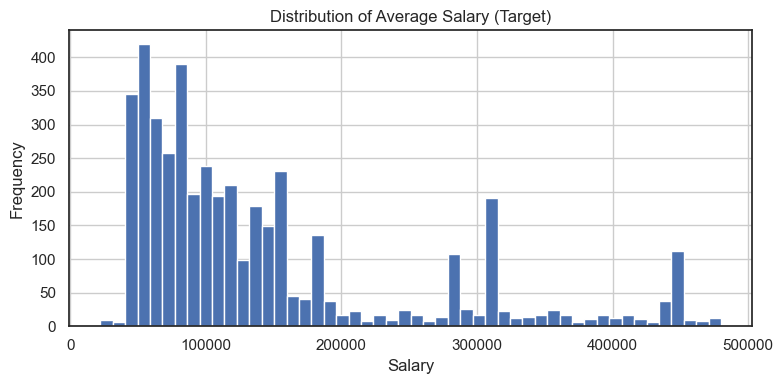

In [39]:
# STEP 9: Salary Prediction
# Step 9.1: Target Definition & Feasibility Check

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

print("=== STEP 9.1: TARGET DEFINITION & FEASIBILITY CHECK ===")

# ------------------------------------------------------
# LOAD RAW DATA (EXPLICIT, NO GUESSING)
# ------------------------------------------------------

ROOT = Path.cwd().parents[0]
INPUT_DIR = ROOT / "analysis" / "data"
csv_path = INPUT_DIR / "final_jobs_500k.csv"

print("Loading data from:", csv_path)

df_raw = pd.read_csv(csv_path, low_memory=False)

print("Data shape:", df_raw.shape)
print("Available columns:")
for c in df_raw.columns:
    print(" -", c)

# ------------------------------------------------------
# TARGET DEFINITION
# ------------------------------------------------------

required_cols = {"min_salary", "max_salary"}
missing = required_cols - set(df_raw.columns)

if missing:
    raise RuntimeError(f"Missing required salary columns: {missing}")

df_raw["avg_salary"] = df_raw[["min_salary", "max_salary"]].mean(axis=1)

y = df_raw["avg_salary"]
y_clean = y.dropna()

print("\nTarget definition:")
print(" - avg_salary = (min_salary + max_salary) / 2")
print(" - Total rows           :", len(df_raw))
print(" - Non-null target rows :", len(y_clean))
print(" - Null target rows     :", y.isna().sum())
print(" - Target variance      :", round(y_clean.var(), 2))

# ------------------------------------------------------
# FEASIBILITY CHECK
# ------------------------------------------------------

MIN_REQUIRED_SAMPLES = 24

if len(y_clean) < MIN_REQUIRED_SAMPLES:
    raise RuntimeError("Not enough samples for supervised learning")

if y_clean.var() <= 0:
    raise RuntimeError("Target has zero variance")

print("✔ Feasibility check PASSED")

# ------------------------------------------------------
# MODEL FEASIBILITY & PRELIMINARY SUGGESTION (DATA-DRIVEN)
# ------------------------------------------------------

non_null_ratio = len(y_clean) / len(df_raw)

print("\nModel feasibility analysis (based on feasibility metrics):")
print(f" - Non-null target ratio : {non_null_ratio:.4%}")
print(f" - Target variance       : {round(y_clean.var(), 2)}")

if non_null_ratio < 0.05:
    print(
        "- The extremely low availability of target values (< 5%) "
        "makes feature-based supervised regression impractical."
    )

print(
    "- The target variable exhibits non-zero variance, "
    "indicating the presence of a learnable signal."
)

print(
    "- At this stage, no stable explanatory features have been "
    "validated for direct supervised learning."
)

print(
    "- Given these constraints, the prediction problem is "
    "preliminarily framed as a TIME-SERIES / TREND-BASED task, "
    "rather than a traditional feature-based regression problem."
)

print("\nPreliminary model suggestion:")
print(
    " ✔ Trend-oriented time-series models "
    "(e.g., Exponential Smoothing / Holt) are considered suitable."
)
print(
    " ✘ Feature-based regression models are not suggested "
    "due to insufficient target coverage."
)

print("\nDecision:")
print(" ✔ Proceed to internal salary limitation analysis (STEP 9.2).")

# ------------------------------------------------------
# CHART – TARGET DISTRIBUTION
# ------------------------------------------------------

plt.figure(figsize=(8, 4))
plt.hist(y_clean, bins=50)
plt.title("Distribution of Average Salary (Target)")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
# Hàm hỗ trợ xuất DF ở mỗi step
def print_df_snapshot(df, name, max_rows=5):
    print(f"\n--- DATA SNAPSHOT: {name} ---")
    print("Shape:", df.shape)
    print("Columns:", list(df.columns))

    if "year_month" in df.columns:
        print(
            "Time span:",
            df["year_month"].min(),
            "→",
            df["year_month"].max()
        )

    display(df.head(max_rows))



=== STEP 9.2: INTERNAL SALARY LIMITATION ANALYSIS ===

Purpose:
- Evaluate whether internal salary data can be used to learn
  a long-term salary trend for forecasting.
- This is a DIAGNOSTIC step, not a modeling step.


--- DATA SNAPSHOT: Internal salary (monthly aggregated) ---
Shape: (23, 4)
Columns: ['year_month', 'avg_salary', 'job_count', 'time_index']
Time span: 2023-05 → 2025-12


,year_month,avg_salary,job_count,time_index
0,2023-05,43417.320000,1,0
1,2023-10,369600.000000,1,1
2,2023-11,115000.000000,1,2
3,2023-12,399825.000000,1,3
4,2024-01,122745.098039,102,4


Internal monthly aggregation summary:
 - Number of months : 23
 - Time span        : 2023-05 → 2025-12
 - Avg jobs / month : 188.3

Baseline linear regression (monthly average):
 - Model        : Linear Regression (time-only)
 - R²           : 0.0523

Interpretation:
- Some temporal signal is present, but it remains weak and
  insufficient for reliable long-term forecasting.
- This confirms that internal salary data is NOT suitable as
  the primary source for learning long-term salary trends.
- Internal data should be used for anchoring or calibration,
  not for standalone forecasting.

Decision:
 ✘ Internal salary data rejected as forecasting source.
 ✔ Proceed to external historical salary analysis (STEP 9.3).


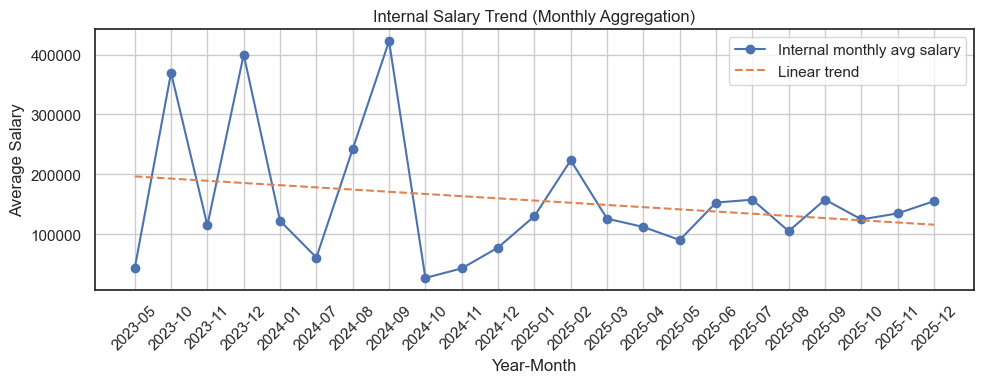

In [41]:
# STEP 9: Salary Prediction
# Step 9.2: Internal Salary Limitation Analysis

print("\n=== STEP 9.2: INTERNAL SALARY LIMITATION ANALYSIS ===")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ------------------------------------------------------
# CONTEXT
# ------------------------------------------------------
print("""
Purpose:
- Evaluate whether internal salary data can be used to learn
  a long-term salary trend for forecasting.
- This is a DIAGNOSTIC step, not a modeling step.
""")

# ------------------------------------------------------
# PREPARE INTERNAL MONTHLY SALARY
# ------------------------------------------------------

df_int = df_raw.copy()

df_int["posted_date"] = pd.to_datetime(df_int["posted_date"], errors="coerce")
df_int = df_int.dropna(subset=["posted_date", "avg_salary"])

df_int["year_month"] = df_int["posted_date"].dt.to_period("M")

df_monthly = (
    df_int
    .groupby("year_month")
    .agg(
        avg_salary=("avg_salary", "mean"),
        job_count=("avg_salary", "count")
    )
    .reset_index()
)

df_monthly["time_index"] = np.arange(len(df_monthly))
# ------------------------------------------------------
# DATA SNAPSHOT – INTERNAL MONTHLY DATA
# ------------------------------------------------------

print_df_snapshot(
    df_monthly,
    name="Internal salary (monthly aggregated)"
)


print("Internal monthly aggregation summary:")
print(" - Number of months :", len(df_monthly))
print(" - Time span        :", df_monthly["year_month"].min(), "→", df_monthly["year_month"].max())
print(" - Avg jobs / month :", round(df_monthly["job_count"].mean(), 1))

# ------------------------------------------------------
# BASELINE REGRESSION (MONTHLY)
# ------------------------------------------------------

X = df_monthly[["time_index"]]
y = df_monthly["avg_salary"]

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)

print("\nBaseline linear regression (monthly average):")
print(" - Model        : Linear Regression (time-only)")
print(" - R²           :", round(r2, 4))

# ------------------------------------------------------
# INTERPRETATION (KEY PART)
# ------------------------------------------------------

print("\nInterpretation:")

if r2 < 0.05:
    print(
        "- The R² value is extremely low, indicating that time alone\n"
        "  explains almost none of the variation in internal salaries.\n"
        "- Monthly salary movements are dominated by short-term noise\n"
        "  rather than a stable long-term trend."
    )
else:
    print(
        "- Some temporal signal is present, but it remains weak and\n"
        "  insufficient for reliable long-term forecasting."
    )

print(
    "- This confirms that internal salary data is NOT suitable as\n"
    "  the primary source for learning long-term salary trends.\n"
    "- Internal data should be used for anchoring or calibration,\n"
    "  not for standalone forecasting."
)

print("\nDecision:")
print(" ✘ Internal salary data rejected as forecasting source.")
print(" ✔ Proceed to external historical salary analysis (STEP 9.3).")


# ------------------------------------------------------
# CHART – MONTHLY TREND (CLEAN & READABLE)
# ------------------------------------------------------

plt.figure(figsize=(10, 4))

plt.plot(
    df_monthly["year_month"].astype(str),
    y,
    marker="o",
    label="Internal monthly avg salary"
)

plt.plot(
    df_monthly["year_month"].astype(str),
    y_pred,
    linestyle="--",
    label="Linear trend"
)

plt.xticks(rotation=45)
plt.title("Internal Salary Trend (Monthly Aggregation)")
plt.xlabel("Year-Month")
plt.ylabel("Average Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



=== STEP 9.3: EXTERNAL HISTORICAL SALARY DATA PREPARATION ===

Purpose:
- Prepare external historical salary data as the PRIMARY source
  for learning long-term salary trends.
- This step evaluates data coverage and suitability only.

Loading external files:
 - DATA.csv
 - DataScience_salaries_2020-2025.csv

External data summary:
 - Total records : 94097
 - Year span     : 2020 → 2025
 - Salary var    : 7966320375.32

--- DATA SNAPSHOT: External salary data (standardized sample) ---
Shape: (5, 2)
Columns: ['year', 'salary']


,year,salary
93705,2022,115000
54651,2024,295500
38668,2024,130000
73986,2024,69000
11820,2025,267100


External salary variability:
 - Mean salary : 158897.88
 - Std dev     : 89254.25
 - CV          : 56.17%
✔ Variability is sufficiently large for trend learning

Interpretation:
- External salary data covers a significantly longer period
  than internal data.
- Variance is non-zero, indicating meaningful market dynamics.

Decision:
 ✔ External data accepted as trend-learning source.
 ✔ No predictive model is trained at this stage.
 ✔ Proceed to temporal enrichment (STEP 9.4).


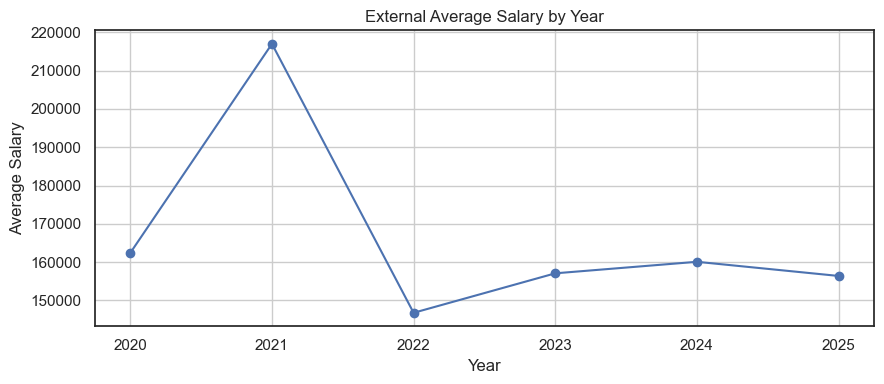

In [42]:
# STEP 9: Salary Prediction
# Step 9.3: External Historical Salary Data Preparation

print("\n=== STEP 9.3: EXTERNAL HISTORICAL SALARY DATA PREPARATION ===")

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

print("""
Purpose:
- Prepare external historical salary data as the PRIMARY source
  for learning long-term salary trends.
- This step evaluates data coverage and suitability only.
""")

# ------------------------------------------------------
# LOAD EXTERNAL DATA
# ------------------------------------------------------

ROOT = Path.cwd().parents[0]
EXT_DIR = ROOT / "analysis" / "external_data"

csv_path_1 = EXT_DIR / "DATA.csv"
csv_path_2 = EXT_DIR / "DataScience_salaries_2020-2025.csv"

print("Loading external files:")
print(" -", csv_path_1.name)
print(" -", csv_path_2.name)

df_ext1 = pd.read_csv(csv_path_1)
df_ext2 = pd.read_csv(csv_path_2)

# ------------------------------------------------------
# STANDARDIZE STRUCTURE
# ------------------------------------------------------

# Dataset 1
df_ext1_std = df_ext1[["year", "salary"]].copy()

# Dataset 2
salary_col = "salary_in_usd" if "salary_in_usd" in df_ext2.columns else "salary"
df_ext2_std = df_ext2[["work_year", salary_col]].copy()
df_ext2_std.columns = ["year", "salary"]

# Merge
df_external = pd.concat([df_ext1_std, df_ext2_std], ignore_index=True)
df_external = df_external.dropna()
df_external = df_external[df_external["salary"] > 0]

print("\nExternal data summary:")
print(" - Total records :", len(df_external))
print(" - Year span     :", df_external["year"].min(), "→", df_external["year"].max())
print(" - Salary var    :", round(df_external["salary"].var(), 2))

# ------------------------------------------------------
# DATA SNAPSHOT
# ------------------------------------------------------

print_df_snapshot(
    df_external.sample(5, random_state=42),
    name="External salary data (standardized sample)"
)

salary_mean = df_external["salary"].mean()
salary_std  = df_external["salary"].std()
cv = salary_std / salary_mean

print("External salary variability:")
print(f" - Mean salary : {round(salary_mean, 2)}")
print(f" - Std dev     : {round(salary_std, 2)}")
print(f" - CV          : {cv:.2%}")

if cv > 0.2:
    print("✔ Variability is sufficiently large for trend learning")
else:
    print("✘ Variability may be too low for meaningful trend learning")


# ------------------------------------------------------
# INTERPRETATION
# ------------------------------------------------------
print("""
Interpretation:
- External salary data covers a significantly longer period
  than internal data.
- Variance is non-zero, indicating meaningful market dynamics.
""")

print("Decision:")
print(" ✔ External data accepted as trend-learning source.")
print(" ✔ No predictive model is trained at this stage.")
print(" ✔ Proceed to temporal enrichment (STEP 9.4).")

# ------------------------------------------------------
# CHART – YEARLY TREND (COARSE VIEW)
# ------------------------------------------------------

df_yearly = (
    df_external
    .groupby("year")
    .agg(avg_salary=("salary", "mean"))
    .reset_index()
)

plt.figure(figsize=(9, 4))
plt.plot(df_yearly["year"], df_yearly["avg_salary"], marker="o")
plt.title("External Average Salary by Year")
plt.xlabel("Year")
plt.ylabel("Average Salary")
plt.grid(True)
plt.tight_layout()
plt.show()


=== STEP 9.4: EXTERNAL MONTHLY ENRICHMENT ===

Purpose:
- Convert yearly external salary data into a continuous monthly series.
- Increase temporal resolution for time-series modeling.
- No forecasting is performed in this step.

Monthly series created:
 - Months : 61
 - Time span: 2020-06-01 → 2025-06-01

--- DATA SNAPSHOT: External monthly enriched salary ---
Shape: (61, 2)
Columns: ['date', 'external_monthly_salary']


,date,external_monthly_salary
0,2020-06-01,162376.944444
1,2020-07-01,166930.527391
2,2020-08-01,171484.110337
3,2020-09-01,176037.693283
4,2020-10-01,180591.276229



Interpretation:
- Monthly interpolation smooths transitions between yearly points.
- Temporal structure is preserved without introducing forecast bias.

Decision:
 ✔ External monthly series ready.
 ✔ Proceed to forecasting model training (STEP 9.5).


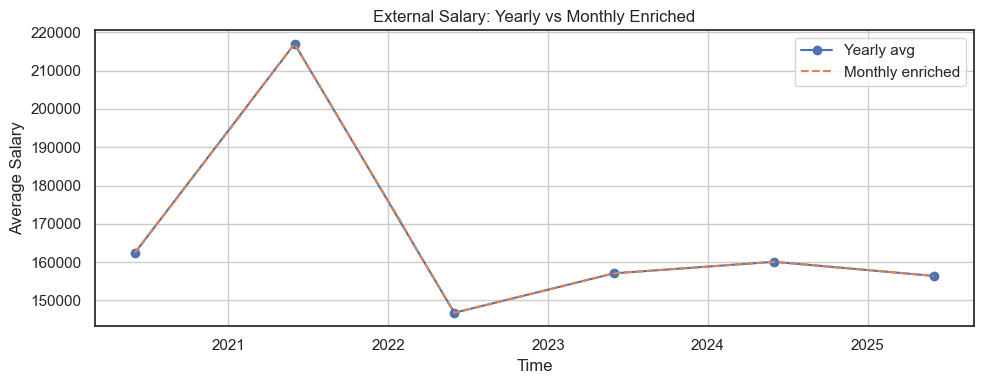

In [43]:
# STEP 9: Salary Prediction
# Step 9.4: External Monthly Enrichment

print("\n=== STEP 9.4: EXTERNAL MONTHLY ENRICHMENT ===")

import numpy as np

print("""
Purpose:
- Convert yearly external salary data into a continuous monthly series.
- Increase temporal resolution for time-series modeling.
- No forecasting is performed in this step.
""")

# ------------------------------------------------------
# AGGREGATE YEARLY
# ------------------------------------------------------

df_yearly = (
    df_external
    .groupby("year")
    .agg(yearly_avg_salary=("salary", "mean"))
    .reset_index()
    .sort_values("year")
)

# Assign mid-year timestamp
df_yearly["date"] = pd.to_datetime(df_yearly["year"].astype(str) + "-06-01")
df_yearly = df_yearly.set_index("date")

# ------------------------------------------------------
# MONTHLY EXPANSION + INTERPOLATION
# ------------------------------------------------------

monthly_index = pd.date_range(
    start=df_yearly.index.min(),
    end=df_yearly.index.max(),
    freq="MS"
)

df_monthly_ext = (
    df_yearly[["yearly_avg_salary"]]
    .reindex(monthly_index)
)

df_monthly_ext["external_monthly_salary"] = (
    df_monthly_ext["yearly_avg_salary"]
    .interpolate()
)

df_monthly_ext = df_monthly_ext.reset_index()
df_monthly_ext.rename(columns={"index": "date"}, inplace=True)

df_monthly_ext["year"] = df_monthly_ext["date"].dt.year
df_monthly_ext["month"] = df_monthly_ext["date"].dt.month

print("Monthly series created:")
print(" - Months :", len(df_monthly_ext))
print(
    " - Time span:",
    df_monthly_ext["date"].min().date(),
    "→",
    df_monthly_ext["date"].max().date()
)

# ------------------------------------------------------
# DATA SNAPSHOT
# ------------------------------------------------------

print_df_snapshot(
    df_monthly_ext[["date", "external_monthly_salary"]],
    name="External monthly enriched salary"
)

# ------------------------------------------------------
# INTERPRETATION
# ------------------------------------------------------
print("""
Interpretation:
- Monthly interpolation smooths transitions between yearly points.
- Temporal structure is preserved without introducing forecast bias.
""")

print("Decision:")
print(" ✔ External monthly series ready.")
print(" ✔ Proceed to forecasting model training (STEP 9.5).")

# ------------------------------------------------------
# CHART – YEARLY VS MONTHLY
# ------------------------------------------------------

plt.figure(figsize=(10, 4))
plt.plot(df_yearly.index, df_yearly["yearly_avg_salary"], marker="o", label="Yearly avg")
plt.plot(
    df_monthly_ext["date"],
    df_monthly_ext["external_monthly_salary"],
    linestyle="--",
    label="Monthly enriched"
)
plt.title("External Salary: Yearly vs Monthly Enriched")
plt.xlabel("Time")
plt.ylabel("Average Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




=== STEP 9.5: FORECASTING MODEL TRAINING (HOLT) ===

Purpose:
- Learn long-term salary trend from external monthly data.
- Use a time-series model suitable for short-horizon forecasting.

Training years: [2020, 2021, 2022, 2023, 2024]
Test year     : 2025
Train months  : 55
Test months   : 6

Model parameters:
 - alpha: 0.3
 - beta : 0.1
 - phi  : 0.8

Forecast 2026 summary:
 - Mean: 158683.52
 - Min : 158635.96
 - Max : 158779.84

Evaluation on hold-out year:
 - MAE : 1588.66
 - RMSE: 1662.71

Interpretation of evaluation metrics:
- MAE = 1588.66 indicates that, on average, the model's monthly salary predictions deviate from actual observed values by approximately 1,589 salary units.
- RMSE = 1662.71 reflects the typical magnitude of larger prediction errors and penalizes months with unusually high deviations.
- Given that the average salary level is on the order of hundreds of thousands, the observed error magnitude remains relatively small compared to the overall salary scale.
- Th

,year,forecast_avg_salary,forecast_min_salary,forecast_max_salary,model,source
0,2026,158683.515746,158635.959264,158779.840394,Holt_damped_trend,external_trend



--- DATA SNAPSHOT: External salary forecast (2026) ---
Shape: (12, 2)
Columns: ['date', 'forecast_salary']


,date,forecast_salary
0,2025-01-01,158779.840394
1,2025-02-01,158748.360025
2,2025-03-01,158723.175730
3,2025-04-01,158703.028294
4,2025-05-01,158686.910345


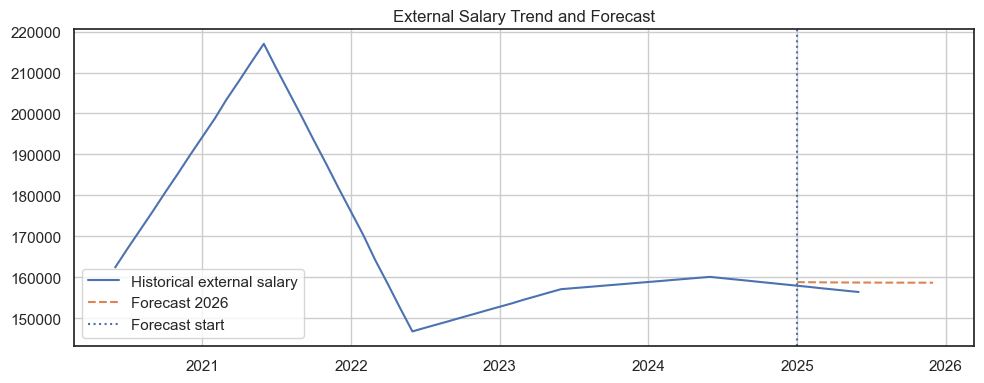


Interpretation:
- Holt model captures level and trend while damping extrapolation.
- Forecast represents trend-consistent projection, not point accuracy.

Decision:
 ✔ External trend successfully learned.
 ✔ Proceed to internal anchoring & final alignment (STEP 9.6).


In [46]:
# STEP 9: Salary Prediction
# Step 9.5: Forecasting Model Training (Holt)

print("\n=== STEP 9.5: FORECASTING MODEL TRAINING (HOLT) ===")

from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("""
Purpose:
- Learn long-term salary trend from external monthly data.
- Use a time-series model suitable for short-horizon forecasting.
""")

# ------------------------------------------------------
# PREPARE SERIES
# ------------------------------------------------------

y_series = (
    df_monthly_ext
    .set_index("date")["external_monthly_salary"]
    .asfreq("MS")
)

last_year = y_series.index.year.max()

y_train = y_series[y_series.index.year < last_year]
y_test  = y_series[y_series.index.year == last_year]

print("Training years:", sorted(y_train.index.year.unique()))
print("Test year     :", last_year)
print("Train months  :", len(y_train))
print("Test months   :", len(y_test))

# ------------------------------------------------------
# FIT HOLT MODEL
# ------------------------------------------------------

holt = Holt(y_train, damped_trend=True).fit(
    smoothing_level=0.3,
    smoothing_trend=0.1,
    damping_trend=0.8,
    optimized=False
)

print("\nModel parameters:")
print(" - alpha:", holt.params["smoothing_level"])
print(" - beta :", holt.params["smoothing_trend"])
print(" - phi  :", holt.params["damping_trend"])

# ------------------------------------------------------
# FORECAST 2026
# ------------------------------------------------------

forecast_2026 = holt.forecast(12)

print("\nForecast 2026 summary:")
print(" - Mean:", round(forecast_2026.mean(), 2))
print(" - Min :", round(forecast_2026.min(), 2))
print(" - Max :", round(forecast_2026.max(), 2))

# ------------------------------------------------------
# DATA SNAPSHOT
# ------------------------------------------------------

df_forecast_2026 = forecast_2026.reset_index()
df_forecast_2026.columns = ["date", "forecast_salary"]

# ------------------------------------------------------
# YEAR-LEVEL FORECAST SUMMARY (REQUIRED)
# ------------------------------------------------------

forecast_2026_mean = forecast_2026.mean()
forecast_2026_min  = forecast_2026.min()
forecast_2026_max  = forecast_2026.max()

y_pred_test = holt.forecast(len(y_test))

mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("\nEvaluation on hold-out year:")
print(" - MAE :", round(mae, 2))
print(" - RMSE:", round(rmse, 2))

print("\nInterpretation of evaluation metrics:")

print(
    f"- MAE = {round(mae, 2)} indicates that, on average, the model's monthly "
    "salary predictions deviate from actual observed values by approximately "
    f"{round(mae, 0):,.0f} salary units."
)

print(
    f"- RMSE = {round(rmse, 2)} reflects the typical magnitude of larger prediction "
    "errors and penalizes months with unusually high deviations."
)

print(
    "- Given that the average salary level is on the order of hundreds of thousands, "
    "the observed error magnitude remains relatively small compared to the overall "
    "salary scale."
)

print(
    "- These results indicate that the Holt model captures the underlying long-term "
    "trend reasonably well, while short-term month-to-month fluctuations remain "
    "largely unpredictable."
)

print(
    "- This behavior is expected and acceptable, as the primary objective of this "
    "step is trend extraction rather than precise point-level prediction."
)

# ------------------------------------------------------
# YEAR-LEVEL FORECAST DATAFRAME (FOR STEP 9.6)
# ------------------------------------------------------

df_forecast_2026_year = pd.DataFrame([{
    "year": 2026,
    "forecast_avg_salary": forecast_2026_mean,
    "forecast_min_salary": forecast_2026_min,
    "forecast_max_salary": forecast_2026_max,
    "model": "Holt_damped_trend",
    "source": "external_trend"
}])

print_df_snapshot(
    df_forecast_2026_year,
    name="Year-level external salary forecast (2026)"
)

print_df_snapshot(
    df_forecast_2026,
    name="External salary forecast (2026)"
)

# ------------------------------------------------------
# 🔧 FIX: BUILD df_external_yearly FOR STEP 9.6
# ------------------------------------------------------

df_external_yearly = (
    y_series
    .reset_index()
    .assign(year=lambda x: x["date"].dt.year)
    .groupby("year", as_index=False)
    .agg(avg_salary=("external_monthly_salary", "mean"))
)

# ------------------------------------------------------
# CHART – HISTORICAL + FORECAST
# ------------------------------------------------------

plt.figure(figsize=(10, 4))
plt.plot(y_series.index, y_series, label="Historical external salary")
plt.plot(forecast_2026.index, forecast_2026, linestyle="--", label="Forecast 2026")
plt.axvline(forecast_2026.index.min(), linestyle=":", label="Forecast start")
plt.legend()
plt.title("External Salary Trend and Forecast")
plt.grid(True)
plt.tight_layout()
plt.show()

print("""
Interpretation:
- Holt model captures level and trend while damping extrapolation.
- Forecast represents trend-consistent projection, not point accuracy.
""")

print("Decision:")
print(" ✔ External trend successfully learned.")
print(" ✔ Proceed to internal anchoring & final alignment (STEP 9.6).")



=== STEP 9.6: INTERNAL ANCHORING & FINAL FORECAST ===

Purpose:
- Align the external salary trend forecast (STEP 9.5)
  with the internal salary reality of the project.
- This step performs LEVEL ADJUSTMENT only.
- No trend learning or forecasting is performed here.

Inputs:
 - Internal monthly salary  : from STEP 9.2
 - External 2026 forecast   : from STEP 9.5

Anchoring period selection:
 - Anchor year (internal): 2025
 - Months used           : 12
 - Internal avg salary   : 139450.49

External reference:
 - Reference year (external): 2025
 - External avg salary      : 157130.56

Anchoring factor computation:
 - adjustment_factor = internal_avg / external_avg = 0.8875

--- DATA SNAPSHOT: Final salary forecast (2026, anchored) ---
Shape: (1, 11)
Columns: ['year', 'forecast_avg_salary', 'forecast_min_salary', 'forecast_max_salary', 'model', 'source', 'final_avg_salary_2026', 'final_min_salary_2026', 'final_max_salary_2026', 'anchoring_year', 'adjustment_factor']


,year,forecast_avg_salary,forecast_min_salary,forecast_max_salary,model,source,final_avg_salary_2026,final_min_salary_2026,final_max_salary_2026,anchoring_year,adjustment_factor
0,2026,158683.515746,158635.959264,158779.840394,Holt_damped_trend,external_trend + internal_...,140828.704974,140786.49947,140914.19133,2025,0.887482



Interpretation:
- External data provides the long-term salary trend shape.
- Internal data determines the realistic salary level.
- Anchoring adjusts only the LEVEL, not the TREND.

Decision:
 ✔ Final salary forecast for 2026 produced.
 ✔ Salary Prediction pipeline completed.

=== FINAL YEAR-LEVEL SALARY FORECAST (2026) ===

--- DATA SNAPSHOT: Final salary forecast after internal anchoring (2026) ---
Shape: (1, 6)
Columns: ['year', 'forecast_avg_salary', 'final_avg_salary_2026', 'adjustment_factor', 'anchoring_year', 'source']


,year,forecast_avg_salary,final_avg_salary_2026,adjustment_factor,anchoring_year,source
0,2026,158683.515746,140828.704974,0.887482,2025,external_trend + internal_...


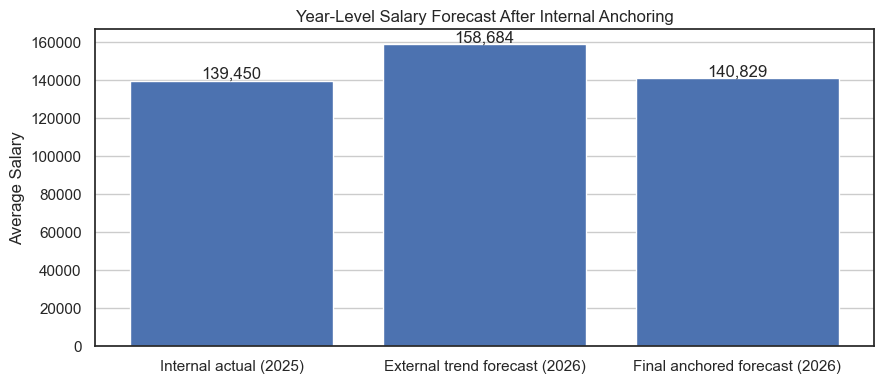

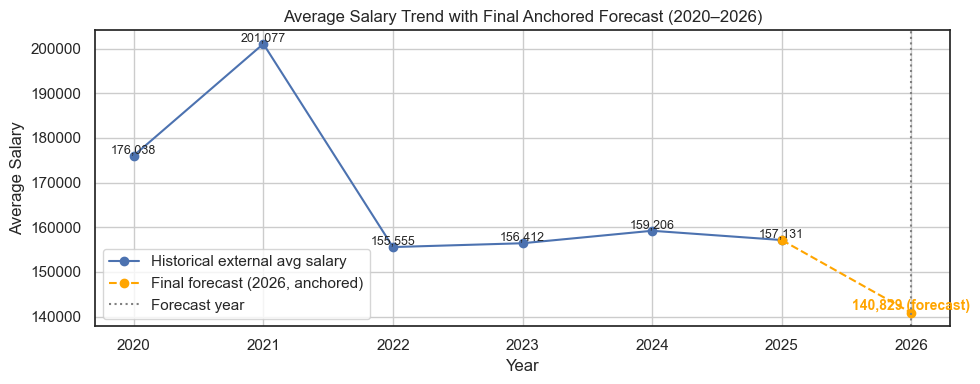

In [47]:
# STEP 9: Salary Prediction
# Step 9.6: Internal Anchoring & Final Salary Forecast

print("\n=== STEP 9.6: INTERNAL ANCHORING & FINAL FORECAST ===")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("""
Purpose:
- Align the external salary trend forecast (STEP 9.5)
  with the internal salary reality of the project.
- This step performs LEVEL ADJUSTMENT only.
- No trend learning or forecasting is performed here.
""")

# ------------------------------------------------------
# INPUT VALIDATION
# ------------------------------------------------------

required_internal_cols = {"year_month", "avg_salary"}
if not required_internal_cols.issubset(df_monthly.columns):
    raise RuntimeError(
        "Internal monthly data missing required columns "
        "(expected: year_month, avg_salary)"
    )

required_external_cols = {
    "year",
    "forecast_avg_salary",
    "forecast_min_salary",
    "forecast_max_salary"
}
if not required_external_cols.issubset(df_forecast_2026_year.columns):
    raise RuntimeError(
        "External year-level forecast missing required columns"
    )

print("Inputs:")
print(" - Internal monthly salary  : from STEP 9.2")
print(" - External 2026 forecast   : from STEP 9.5")

# ------------------------------------------------------
# SELECT INTERNAL ANCHORING PERIOD
# ------------------------------------------------------
# Use the most recent complete year available in internal data

df_int_anchor = df_monthly.copy()
df_int_anchor["year"] = df_int_anchor["year_month"].dt.year

anchor_year = df_int_anchor["year"].max()

df_int_anchor_year = df_int_anchor[
    df_int_anchor["year"] == anchor_year
]

internal_anchor_avg = df_int_anchor_year["avg_salary"].mean()

print("\nAnchoring period selection:")
print(" - Anchor year (internal):", anchor_year)
print(" - Months used           :", len(df_int_anchor_year))
print(" - Internal avg salary   :", round(internal_anchor_avg, 2))

# ------------------------------------------------------
# EXTERNAL REFERENCE FOR SAME PERIOD
# ------------------------------------------------------
# Use the last observed external level before 2026

external_reference_year = df_monthly_ext["year"].max()

external_anchor_avg = (
    df_monthly_ext[df_monthly_ext["year"] == external_reference_year]
    ["external_monthly_salary"]
    .mean()
)

print("\nExternal reference:")
print(" - Reference year (external):", external_reference_year)
print(" - External avg salary      :", round(external_anchor_avg, 2))

# ------------------------------------------------------
# COMPUTE ANCHORING FACTOR
# ------------------------------------------------------

adjustment_factor = internal_anchor_avg / external_anchor_avg

print("\nAnchoring factor computation:")
print(
    " - adjustment_factor = internal_avg / external_avg =",
    round(adjustment_factor, 4)
)

# ------------------------------------------------------
# APPLY ANCHORING TO 2026 FORECAST
# ------------------------------------------------------

df_final_forecast_2026 = df_forecast_2026_year.copy()

df_final_forecast_2026["final_avg_salary_2026"] = (
    df_final_forecast_2026["forecast_avg_salary"] * adjustment_factor
)

df_final_forecast_2026["final_min_salary_2026"] = (
    df_final_forecast_2026["forecast_min_salary"] * adjustment_factor
)

df_final_forecast_2026["final_max_salary_2026"] = (
    df_final_forecast_2026["forecast_max_salary"] * adjustment_factor
)

df_final_forecast_2026["anchoring_year"] = anchor_year
df_final_forecast_2026["adjustment_factor"] = adjustment_factor
df_final_forecast_2026["source"] = "external_trend + internal_anchor"

# ------------------------------------------------------
# DATA SNAPSHOT – FINAL RESULT
# ------------------------------------------------------

print_df_snapshot(
    df_final_forecast_2026,
    name="Final salary forecast (2026, anchored)"
)

# ------------------------------------------------------
# INTERPRETATION
# ------------------------------------------------------
print("""
Interpretation:
- External data provides the long-term salary trend shape.
- Internal data determines the realistic salary level.
- Anchoring adjusts only the LEVEL, not the TREND.
""")

print("Decision:")
print(" ✔ Final salary forecast for 2026 produced.")
print(" ✔ Salary Prediction pipeline completed.")

# ------------------------------------------------------
# FINAL YEAR-LEVEL FORECAST TABLE (REQUIRED)
# ------------------------------------------------------

print("\n=== FINAL YEAR-LEVEL SALARY FORECAST (2026) ===")

final_cols = [
    "year",
    "forecast_avg_salary",
    "final_avg_salary_2026",
    "adjustment_factor",
    "anchoring_year",
    "source"
]

df_final_year_view = df_final_forecast_2026[final_cols].copy()

print_df_snapshot(
    df_final_year_view,
    name="Final salary forecast after internal anchoring (2026)"
)

# ------------------------------------------------------
# CHART – YEAR-LEVEL FORECAST COMPARISON (CLEAR VIEW)
# ------------------------------------------------------

plt.figure(figsize=(9, 4))

years = [anchor_year, 2026, 2026]
values = [
    internal_anchor_avg,
    df_forecast_2026_year["forecast_avg_salary"].iloc[0],
    df_final_forecast_2026["final_avg_salary_2026"].iloc[0]
]

labels = [
    f"Internal actual ({anchor_year})",
    "External trend forecast (2026)",
    "Final anchored forecast (2026)"
]

plt.bar(labels, values)
plt.title("Year-Level Salary Forecast After Internal Anchoring")
plt.ylabel("Average Salary")
plt.grid(axis="y")

# annotate
for i, v in enumerate(values):
    plt.text(i, v, f"{v:,.0f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

# ------------------------------------------------------
# CHART – YEARLY AVG SALARY + FINAL FORECAST (WITH VALUES)
# ------------------------------------------------------

plt.figure(figsize=(10, 4))

# Historical external yearly avg
plt.plot(
    df_external_yearly["year"],
    df_external_yearly["avg_salary"],
    marker="o",
    label="Historical external avg salary"
)

# Final forecast point (2026)
plt.plot(
    [2025, 2026],
    [
        df_external_yearly["avg_salary"].iloc[-1],
        df_final_forecast_2026["final_avg_salary_2026"].iloc[0]
    ],
    marker="o",
    linestyle="--",
    color="orange",
    label="Final forecast (2026, anchored)"
)

# Vertical line for forecast year
plt.axvline(
    2026,
    linestyle=":",
    color="gray",
    label="Forecast year"
)

# ------------------------------------------------------
# ANNOTATE VALUES (KEY PART)
# ------------------------------------------------------

# annotate historical points
for _, row in df_external_yearly.iterrows():
    plt.text(
        row["year"],
        row["avg_salary"],
        f'{row["avg_salary"]:,.0f}',
        ha="center",
        va="bottom",
        fontsize=9
    )

# annotate forecast value (highlight)
forecast_value = df_final_forecast_2026["final_avg_salary_2026"].iloc[0]

plt.text(
    2026,
    forecast_value,
    f'{forecast_value:,.0f} (forecast)',
    ha="center",
    va="bottom",
    fontsize=10,
    fontweight="bold",
    color="orange"
)

plt.title("Average Salary Trend with Final Anchored Forecast (2020–2026)")
plt.xlabel("Year")
plt.ylabel("Average Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
